In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
import seaborn as sns
from scipy import stats

# plt.style.use('dark_background')

author: Tsvetomir Pavlov
# Energy consumption
## What does it imply?
## Do developed countries use more energy?
## Is energy consumption an indicator of a civilization's level of technological advancement?

#### Lyrical intro:

"Let there be light!" - said someone somewhere and his electricity bill skyrocketed... and then the same guy, slightly infuriated of the constant outages, voltage drops and high prices invented a new, better way to harness energy and all was fine. Until someone somewhere plugged in their mighty new never before seen automatic sock knitting machine and it worked!! But no one could see it, because all the lights went out. A new energy source was needed again, and so on and so forth. Fortunately today humanity tries to predicts its electricity demands and innovate and act in advance before the power grid blows up and millions of households succumb in darkness, or more tragically some poor soul looses their unsaved progress on a data science project. Is the constant cat and mouse game of growing energy demands and power production a sign of prosperity?


While searching I found many interesting data sets, but this one caught my eye - "World Development Indicators". I am not into economics, but a quick look showed that, how developed a country is, depends on a ton of non-economic factors. Also not long ago I watched [an interesting video about the Kardashev scale](https://youtu.be/rhFK5_Nx9xY), according to which a "godlike" alien civilization is so advanced that it harnesses the energy from quasars of multiple galaxies. Where is humanity on the scale? - It is at 0.75, very close to a Type I civ, but not quite. 

### About the data set:

Originally I found the data on kaggle [(link)](https://www.kaggle.com/worldbank/world-development-indicators). It has a 7.6 usability score and I can see why. Information on the data set as a whole can be found [here](https://datacatalog.worldbank.org/dataset/world-development-indicators). Their short description is as follows: "The primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates". Type is noted to be "**Time Series**". There seems to be **no detailed information for each column**. The data from kaggle comes with 8 files, of which "Indicators.csv" holds the main info, "Series.csv" has additional information for every indicator.

# IMPORTANT "Indicators.csv" is too big and should be downloaded from this link (https://mega.nz/file/4wZVnKzS#W2Y800870bcq7joLqD7nfyEdgtRq_fSgm-sicU5tTrc), or from the original kaggle page. It should be placed in "data/world_development_indicators".

## Exploratory data analysis

### Cheking out "Indicators.csv"

In [3]:
path_to_WDI = os.path.join("data", "world_development_indicators", "Indicators.csv")

"**WDI**" is an acronym for "World Development Indicators". The data set has **commas** as its separator, there should not be any issues with reading the data.

In [4]:
WDI_data = pd.read_csv(path_to_WDI)

In [5]:
WDI_data

CountryName CountryCode  \
0        Arab World         ARB   
1        Arab World         ARB   
2        Arab World         ARB   
3        Arab World         ARB   
4        Arab World         ARB   
...             ...         ...   
5656453    Zimbabwe         ZWE   
5656454    Zimbabwe         ZWE   
5656455    Zimbabwe         ZWE   
5656456    Zimbabwe         ZWE   
5656457    Zimbabwe         ZWE   

                                             IndicatorName      IndicatorCode  \
0        Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
1        Age dependency ratio (% of working-age populat...        SP.POP.DPND   
2        Age dependency ratio, old (% of working-age po...     SP.POP.DPND.OL   
3        Age dependency ratio, young (% of working-age ...     SP.POP.DPND.YG   
4              Arms exports (SIPRI trend indicator values)     MS.MIL.XPRT.KD   
...                                                    ...                ...   
5656453          Time required to register property (days)        IC.PRP.DURS   
5656454           Time required to start a business (days)        IC.REG.DURS   
5656455              Time to prepare and pay taxes (hours)        IC.TAX.DURS   
5656456                 Time to resolve insolvency (years)        IC.ISV.DURS   
5656457           Total tax rate (% of commercial profits)  IC.TAX.TOTL.CP.ZS   

         Year         Value  
0        1960  1.335609e+02  
1        1960  8.779760e+01  
2        1960  6.634579e+00  
3        1960  8.102333e+01  
4        1960  3.000000e+06  
...       ...           ...  
5656453  2015  3.600000e+01  
5656454  2015  9.000000e+01  
5656455  2015  2.420000e+02  
5656456  2015  3.300000e+00  
5656457  2015  3.280000e+01  

[5656458 rows x 6 columns]

Renaming the columns to follow pythons naming conventions.

In [6]:
WDI_data.columns = ["country_name", "country_code", "indicator_name", "indicator_code", "year", "value"]

In [7]:
WDI_data.head(3)

country_name country_code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      indicator_name  indicator_code  year  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1960   
1  Age dependency ratio (% of working-age populat...     SP.POP.DPND  1960   
2  Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL  1960   

        value  
0  133.560907  
1   87.797601  
2    6.634579

In [8]:
WDI_data.shape

(5656458, 6)

The number of columns and their names are correctly read. The number of rows matches the CSV file.

In [9]:
WDI_data.sample(10)

country_name country_code  \
2870865             Sri Lanka          LKA   
1994852         Venezuela, RB          VEN   
3843183     Equatorial Guinea          GNQ   
497147            Yemen, Rep.          YEM   
774773               Suriname          SUR   
3772135   Trinidad and Tobago          TTO   
2579449             Nicaragua          NIC   
3056041               Belgium          BEL   
3483053  High income: nonOECD          NOC   
5548722   Antigua and Barbuda          ATG   

                                            indicator_name     indicator_code  \
2870865         Taxes on international trade (current LCU)     GC.TAX.INTT.CN   
1994852              High-technology exports (current US$)     TX.VAL.TECH.CD   
3843183                            GNI (constant 2005 US$)     NY.GNP.MKTP.KD   
497147      CO2 emissions from solid fuel consumption (kt)  EN.ATM.CO2E.SF.KT   
774773                       Cereal yield (kg per hectare)     AG.YLD.CREL.KG   
3772135  Lifetime risk of maternal death (1 in: rate va...        SH.MMR.RISK   
2579449     Gross enrolment ratio, primary, both sexes (%)        SE.PRM.ENRR   
3056041    Labor force with primary education (% of total)     SL.TLF.PRIM.ZS   
3483053  Share of tariff lines with specific rates, pri...  TM.TAX.TCOM.SR.ZS   
5548722        Imports of goods and services (current LCU)     NE.IMP.GNFS.CN   

         year         value  
2870865  1997  2.674300e+10  
1994852  1990  7.368842e+07  
3843183  2004  4.041960e+09  
497147   1972  0.000000e+00  
774773   1976  3.559863e+03  
3772135  2003  9.000000e+02  
2579449  1995  9.650830e+01  
3056041  1999  3.330000e+01  
3483053  2002  1.050046e+01  
5548722  2014  1.957129e+09

In [10]:
WDI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   country_name    object 
 1   country_code    object 
 2   indicator_name  object 
 3   indicator_code  object 
 4   year            int64  
 5   value           float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


Data types look fine. The "value" column is **float64**, in the data set it is shown in **scientific notation**, but this should **not** be a problem. The data set is massive and it needs some tidying...

In [11]:
WDI_data["country_name"].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (developing only)', 'Euro area',
       'Europe & Central Asia (all income levels)',
       'Europe & Central Asia (developing only)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'High income: nonOECD', 'High income: OECD',
       'Latin America & Caribbean (all income levels)',
       'Latin America & Caribbean (developing only)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa (all income levels)',
       'Middle East & North Africa (developing only)', 'Middle income',
       'North America', 'OECD members', 'Other small states',
       'Pacific island small states', 'Small states', 'South Asia',
       'Sub-Saharan Afr

In [12]:
 len(WDI_data["country_name"].unique())

247

The column "**country_name**" is slightly misleading, because it holds groups of multiple countries such as "Central Europe and the Baltics", "High income". These groupings might come in handy. Also lets see what gets left over if we remove all the 195 countries of today (taken from [here](https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/)). This is not very scientific, as some countries may not exist now, but are present in the data set, but this will make it just a bit easier to evaluate what this column holds. 

In [13]:
countries_in_the_world = {"China", "India", "United States", "Indonesia", "Pakistan", "Brazil", "Nigeria", "Bangladesh", "Russia", "Mexico", "Japan", "Ethiopia", "Philippines", "Egypt", "Vietnam", "DR Congo", "Turkey", "Iran", "Germany", "Thailand", "United Kingdom", "France", "Italy", "Tanzania", "South Africa", "Myanmar", "Kenya", "South Korea", "Colombia", "Spain", "Uganda", "Argentina", "Algeria", "Sudan", "Ukraine", "Iraq", "Afghanistan", "Poland", "Canada", "Morocco", "Saudi Arabia", "Uzbekistan", "Peru", "Angola", "Malaysia", "Mozambique", "Ghana", "Yemen", "Nepal", "Venezuela", "Madagascar", "Cameroon", "C?te d'Ivoire", "North Korea", "Australia", "Niger", "Sri Lanka", "Burkina Faso", "Mali", "Romania", "Malawi", "Chile", "Kazakhstan", "Zambia", "Guatemala", "Ecuador", "Syria", "Netherlands", "Senegal", "Cambodia", "Chad", "Somalia", "Zimbabwe", "Guinea", "Rwanda", "Benin", "Burundi", "Tunisia", "Bolivia", "Belgium", "Haiti", "Cuba", "South Sudan", "Dominican Republic", "Czech Republic (Czechia)", "Greece", "Jordan", "Portugal", "Azerbaijan", "Sweden", "Honduras", "United Arab Emirates", "Hungary", "Tajikistan", "Belarus", "Austria", "Papua New Guinea", "Serbia", "Israel", "Switzerland", "Togo", "Sierra Leone", "Laos", "Paraguay", "Bulgaria", "Libya", "Lebanon", "Nicaragua", "Kyrgyzstan", "El Salvador", "Turkmenistan", "Singapore", "Denmark", "Finland", "Congo", "Slovakia", "Norway", "Oman", "State of Palestine", "Costa Rica", "Liberia", "Ireland", "Central African Republic", "New Zealand", "Mauritania", "Panama", "Kuwait", "Croatia", "Moldova", "Georgia", "Eritrea", "Uruguay", "Bosnia and Herzegovina", "Mongolia", "Armenia", "Jamaica", "Qatar", "Albania", "Lithuania", "Namibia", "Gambia", "Botswana", "Gabon", "Lesotho", "North Macedonia", "Slovenia", "Guinea-Bissau", "Latvia", "Bahrain", "Equatorial Guinea", "Trinidad and Tobago", "Estonia", "Timor-Leste", "Mauritius", "Cyprus", "Eswatini", "Djibouti", "Fiji", "Comoros", "Guyana", "Bhutan", "Solomon Islands", "Montenegro", "Luxembourg", "Suriname", "Cabo Verde", "Maldives", "Malta", "Brunei", "Belize", "Bahamas", "Iceland", "Vanuatu", "Barbados", "Sao Tome & Principe", "Samoa", "Saint Lucia", "Kiribati", "Micronesia", "Grenada", "St. Vincent & Grenadines", "Tonga", "Seychelles", "Antigua and Barbuda", "Andorra", "Dominica", "Marshall Islands", "Saint Kitts & Nevis", "Monaco", "Liechtenstein", "San Marino", "Palau", "Tuvalu", "Nauru", "Holy See"}

In [14]:
[group for group in WDI_data["country_name"].unique() if group not in countries_in_the_world]

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [15]:
WDI_data["year"].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

Some countries at some point changed forms of government which affected their name, i.e. 'Korea, Dem. Rep.' and 'Korea, Rep.'.

In [16]:
WDI_data["country_code"].unique()

array(['ARB', 'CSS', 'CEB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU',
       'FCS', 'HPC', 'HIC', 'NOC', 'OEC', 'LCN', 'LAC', 'LDC', 'LMY',
       'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS',
       'SST', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB', 'DZA',
       'ASM', 'ADO', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT',
       'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN',
       'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI',
       'CHL', 'CHN', 'COL', 'COM', 'ZAR', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN',
       'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMY', 'ISR',
       'ITA', 'JAM',

In [17]:
assert(len(WDI_data["country_name"].unique()) == len(WDI_data["country_code"].unique()))

It is nice to see that the groupings have 3 letter unique codes.

In [18]:
WDI_data["indicator_name"].unique()

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)', ...,
       'Fish species, threatened', 'Mammal species, threatened',
       'Plant species (higher), threatened'], dtype=object)

In [19]:
print(f"Number of indicators: {len(WDI_data['indicator_name'].unique())}")

Number of indicators: 1344


In [20]:
print(f"Number of indicator codes: {len(WDI_data['indicator_code'].unique())}")

Number of indicator codes: 1344


In [21]:
print(f"Newest data: {WDI_data['year'].max()}, Oldest data: {WDI_data['year'].min()}")

Newest data: 2015, Oldest data: 1960


In [22]:
WDI_data["value"].isna().sum()

0

There are no NaN values, that means every indicator has a value.

### A look at "Country.csv"

In [23]:
path_to_counrty_data = os.path.join("data", "world_development_indicators", "Country.csv")

In [24]:
country_info = pd.read_csv(path_to_counrty_data)

In [25]:
country_info

CountryCode           ShortName           TableName  \
0           AFG         Afghanistan         Afghanistan   
1           ALB             Albania             Albania   
2           DZA             Algeria             Algeria   
3           ASM      American Samoa      American Samoa   
4           ADO             Andorra             Andorra   
..          ...                 ...                 ...   
242         WBG  West Bank and Gaza  West Bank and Gaza   
243         WLD               World               World   
244         YEM               Yemen         Yemen, Rep.   
245         ZMB              Zambia              Zambia   
246         ZWE            Zimbabwe            Zimbabwe   

                                    LongName Alpha2Code        CurrencyUnit  \
0               Islamic State of Afghanistan         AF      Afghan afghani   
1                        Republic of Albania         AL        Albanian lek   
2    People's Democratic Republic of Algeria         DZ      Algerian dinar   
3                             American Samoa         AS         U.S. dollar   
4                    Principality of Andorra         AD                Euro   
..                                       ...        ...                 ...   
242                       West Bank and Gaza         PS  Israeli new shekel   
243                                    World         1W                 NaN   
244                        Republic of Yemen         YE         Yemeni rial   
245                       Republic of Zambia         ZM  New Zambian kwacha   
246                     Republic of Zimbabwe         ZW         U.S. dollar   

                                          SpecialNotes  \
0    Fiscal year end: March 20; reporting period fo...   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
242                         The new base year is 2004.   
243                                   World aggregate.   
244  Based on official government statistics and In...   
245  The new base year is 2010. National accounts d...   
246  Fiscal year end: June 30; reporting period for...   

                         Region           IncomeGroup Wb2Code  ...  \
0                    South Asia            Low income      AF  ...   
1         Europe & Central Asia   Upper middle income      AL  ...   
2    Middle East & North Africa   Upper middle income      DZ  ...   
3           East Asia & Pacific   Upper middle income      AS  ...   
4         Europe & Central Asia  High income: nonOECD      AD  ...   
..                          ...                   ...     ...  ...   
242  Middle East & North Africa   Lower middle income      GZ  ...   
243                         NaN                   NaN      1W  ...   
244  Middle East & North Africa   Lower middle income      RY  ...   
245          Sub-Saharan Africa   Lower middle income      ZM  ...   
246          Sub-Saharan Africa            Low income      ZW  ...   

         GovernmentAccountingConcept  \
0    Consolidated central government   
1       Budgetary central government   
2       Budgetary central government   
3                                NaN   
4                                NaN   
..                               ...   
242     Budgetary central government   
243                              NaN   
244     Budgetary central government   
245     Budgetary central government   
246  Consolidated central government   

                   ImfDataDisseminationStandard  \
0      General Data Dissemination System (GDDS)   
1      General Data Dissemination System (GDDS)   
2      General Data Dissemination System (GDDS)   
3                                           NaN   
4                                           NaN   
..                   

In [26]:
country_info.shape

(247, 31)

In [27]:
country_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CountryCode                                 247 non-null    object 
 1   ShortName                                   247 non-null    object 
 2   TableName                                   247 non-null    object 
 3   LongName                                    247 non-null    object 
 4   Alpha2Code                                  244 non-null    object 
 5   CurrencyUnit                                214 non-null    object 
 6   SpecialNotes                                164 non-null    object 
 7   Region                                      214 non-null    object 
 8   IncomeGroup                                 214 non-null    object 
 9   Wb2Code                                     246 non-null    object 
 10  NationalAccoun

Lets check if "**country_code**" from "**WDI_data**" and "**CountryCode**" contain the same codes. If so, later these code can be used for merging.

In [28]:
# assert(', '.join(WDI_data["country_code"].unique()) == ', '.join(country_info["CountryCode"].unique()))
print("===============!!!===============")
print("This test gives 'AssertionError'")
print("===============!!!===============")

===============!!!===============
This test gives 'AssertionError'
===============!!!===============


In [29]:
unique_codes_WDI_data = set(WDI_data["country_code"])
[code for code in country_info["CountryCode"].unique() if code not in unique_codes_WDI_data]

[]

But the test above shows that everything should be fine... And the test bellow returns "**False**". This is because of a little oversight of mine. __", ".join(list)__ joins the list as is, unsorted. The strings "A, B, C" and "B, A, C" have the same letters, but as strings, they are not equal. I need to sort them first, or check by items.

In [30]:
a = ', '.join(WDI_data["country_code"].unique())
b = ', '.join(country_info["CountryCode"].unique())
a == b

False

In [31]:
# a, b

In [32]:
a[:100], b[:100]

('ARB, CSS, CEB, EAS, EAP, EMU, ECS, ECA, EUU, FCS, HPC, HIC, NOC, OEC, LCN, LAC, LDC, LMY, LIC, LMC, ',
 'AFG, ALB, DZA, ASM, ADO, AGO, ATG, ARB, ARG, ARM, ABW, AUS, AUT, AZE, BHR, BGD, BRB, BLR, BEL, BLZ, ')

These above **differ** in order.

In [33]:
codes_from_WDI_data = ', '.join(sorted(WDI_data["country_code"].unique()))
codes_from_country_info = ', '.join(sorted(country_info["CountryCode"].unique()))
assert(codes_from_WDI_data == codes_from_country_info)

This is much better. Also I am not sure if I should include these kinds of mistakes.

With this minor segway out of the way lets continue. The data set read properly. It is possible to merge this data set to the main one directly.

In [34]:
country_info["Region"].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', nan,
       'North America'], dtype=object)

In [35]:
country_info["IncomeGroup"].unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

### "Series.csv"

In [36]:
path_to_series = os.path.join("data", "world_development_indicators", "Series.csv")

In [37]:
indicator_info = pd.read_csv(path_to_series)

In [38]:
indicator_info

SeriesCode                                              Topic  \
0           BN.KLT.DINV.CD  Economic Policy & Debt: Balance of payments: C...   
1     BX.KLT.DINV.WD.GD.ZS  Economic Policy & Debt: Balance of payments: C...   
2        BX.KLT.DINV.CD.WD  Economic Policy & Debt: Balance of payments: C...   
3        BM.KLT.DINV.GD.ZS  Economic Policy & Debt: Balance of payments: C...   
4           BN.TRF.KOGT.CD  Economic Policy & Debt: Balance of payments: C...   
...                    ...                                                ...   
1340  SL.UEM.1524.FE.NE.ZS            Social Protection & Labor: Unemployment   
1341     SL.UEM.1524.MA.ZS            Social Protection & Labor: Unemployment   
1342  SL.UEM.1524.MA.NE.ZS            Social Protection & Labor: Unemployment   
1343        SL.UEM.1524.ZS            Social Protection & Labor: Unemployment   
1344     SL.UEM.1524.NE.ZS            Social Protection & Labor: Unemployment   

                                          IndicatorName ShortDefinition  \
0     Foreign direct investment, net (BoP, current US$)             NaN   
1     Foreign direct investment, net inflows (% of GDP)             NaN   
2     Foreign direct investment, net inflows (BoP, c...             NaN   
3     Foreign direct investment, net outflows (% of ...             NaN   
4                Net capital account (BoP, current US$)             NaN   
...                                                 ...             ...   
1340  Unemployment, youth female (% of female labor ...             NaN   
1341  Unemployment, youth male (% of male labor forc...             NaN   
1342  Unemployment, youth male (% of male labor forc...             NaN   
1343  Unemployment, youth total (% of total labor fo...             NaN   
1344  Unemployment, youth total (% of total labor fo...             NaN   

                                         LongDefinition UnitOfMeasure  \
0     Foreign direct investment are the net inflows ...           NaN   
1     Foreign direct investment are the net inflows ...           NaN   
2     Foreign direct investment refers to direct inv...           NaN   
3     Foreign direct investment are the net inflows ...           NaN   
4     Net capital account records acquisitions and d...           NaN   
...                                                 ...           ...   
1340  Youth unemployment refers to the share of the ...           NaN   
1341  Youth unemployment refers to the share of the ...           NaN   
1342  Youth unemployment refers to the share of the ...           NaN   
1343  Youth unemployment refers to the share of the ...           NaN   
1344  Youth unemployment refers to the share of the ...           NaN   

     Periodicity BasePeriod  OtherNotes AggregationMethod  \
0         Annual        NaN         NaN               NaN   
1         Annual        NaN         NaN  Weighted average   
2         Annual        NaN         NaN               Sum   
3         Annual        NaN         NaN  Weighted average   
4         Annual        NaN         NaN               NaN   
...          ...        ...         ...               ...   
1340      Annual        NaN         NaN  Weighted average   
1341      Annual        NaN         NaN  Weighted average   
1342      Annual        NaN         NaN  Weighted average   
1343      Annual        NaN         NaN  Weighted average   
1344      Annual        NaN         NaN  Weighted average   

                               LimitationsAndExceptions  \
0                                                   NaN   
1     FDI data do not give a complete picture of int...   
2     FDI data do not give a complete picture of int...   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1340  Data on youth unemployment are drawn from labo...   
1341  There may be persons not currently in the labo...   
1

In [39]:
indicator_info.shape

(1345, 20)

In [40]:
indicator_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SeriesCode                        1345 non-null   object 
 1   Topic                             1345 non-null   object 
 2   IndicatorName                     1345 non-null   object 
 3   ShortDefinition                   118 non-null    object 
 4   LongDefinition                    1345 non-null   object 
 5   UnitOfMeasure                     7 non-null      object 
 6   Periodicity                       1345 non-null   object 
 7   BasePeriod                        77 non-null     object 
 8   OtherNotes                        0 non-null      float64
 9   AggregationMethod                 1058 non-null   object 
 10  LimitationsAndExceptions          711 non-null    object 
 11  NotesFromOriginalSource           38 non-null     object 
 12  Genera

In [41]:
indicator_codes_WDI_data = ', '.join(sorted(WDI_data["indicator_code"].unique()))
indicator_codes_indicator_info = ', '.join(sorted(indicator_info["SeriesCode"].unique()))
# assert(indicator_codes_WDI_data == indicator_codes_indicator_info)
print("This gives 'AssertionError'")

This gives 'AssertionError'


In [42]:
[code for code in indicator_info["SeriesCode"].unique() if code not in indicator_codes_WDI_data.split(", ")]

['IC.LGL.PROC']

The data set read normally. Compared to WDI_data, indicator_info has one extra indicator code (so one indicator name also). "indicator_info" is called so, because it holds info for the development indicators. All columns are worth a quick look.

In [43]:
indicator_info["Topic"].unique()

array(['Economic Policy & Debt: Balance of payments: Capital & financial account',
       'Economic Policy & Debt: Balance of payments: Current account: Balances',
       'Economic Policy & Debt: Balance of payments: Current account: Goods, services & income',
       'Economic Policy & Debt: Balance of payments: Current account: Transfers',
       'Economic Policy & Debt: Balance of payments: Reserves & other items',
       'Economic Policy & Debt: External debt: Amortization',
       'Economic Policy & Debt: External debt: Arrears, reschedulings, etc.',
       'Economic Policy & Debt: External debt: Commitments',
       'Economic Policy & Debt: External debt: Currency composition',
       'Economic Policy & Debt: External debt: Debt outstanding',
       'Economic Policy & Debt: External debt: Debt ratios & other items',
       'Economic Policy & Debt: External debt: Debt service',
       'Economic Policy & Debt: External debt: Disbursements',
       'Economic Policy & Debt: External d

In [44]:
len(indicator_info["Topic"].unique())

91

The column "**Topic**" is very useful and will come in handy later. And why did I do this bellow, renaming only the column "Topic". It is so that I can reuse the function "give_indicators_on_topic" more. So this is a small change I made after the fact.

In [45]:
cols = indicator_info.columns.tolist()
cols[1] = "topic"
indicator_info.columns = cols
indicator_info.sample()

SeriesCode                                              topic  \
310  NY.GNP.MKTP.KN  Economic Policy & Debt: National accounts: Loc...   

          IndicatorName ShortDefinition  \
310  GNI (constant LCU)             NaN   

                                        LongDefinition UnitOfMeasure  \
310  GNI (formerly GNP) is the sum of value added b...           NaN   

    Periodicity BasePeriod  OtherNotes AggregationMethod  \
310      Annual        NaN         NaN               NaN   

    LimitationsAndExceptions NotesFromOriginalSource GeneralComments  \
310                      NaN                     NaN             NaN   

                                                Source  \
310  World Bank national accounts data, and OECD Na...   

    StatisticalConceptAndMethodology DevelopmentRelevance RelatedSourceLinks  \
310                              NaN                  NaN                NaN   

     OtherWebLinks  RelatedIndicators LicenseType  
310            NaN                NaN        Open

In [46]:
def give_indicators_on_topic(df, topic):
    """
    Return a Data Frame including only indicators in a specific topic. 
    """
    df = df[df["topic"] == topic]
    return df

In [47]:
# energy_prod_and_use_data = indicator_info[indicator_info["Topic"] == "Environment: Energy production & use"]

In [48]:
energy_prod_and_use_data = give_indicators_on_topic(indicator_info, "Environment: Energy production & use")

In [49]:
energy_prod_and_use_data

SeriesCode                                 topic  \
674        EG.ELC.ACCS.ZS  Environment: Energy production & use   
675     EG.ELC.ACCS.RU.ZS  Environment: Energy production & use   
676     EG.ELC.ACCS.UR.ZS  Environment: Energy production & use   
677        EG.NSF.ACCS.ZS  Environment: Energy production & use   
678     EG.NSF.ACCS.RU.ZS  Environment: Energy production & use   
679     EG.NSF.ACCS.UR.ZS  Environment: Energy production & use   
680     EG.USE.COMM.CL.ZS  Environment: Energy production & use   
681        EG.USE.CRNW.ZS  Environment: Energy production & use   
682     EG.USE.ELEC.KH.PC  Environment: Energy production & use   
683        EG.ELC.LOSS.ZS  Environment: Energy production & use   
684        EG.ELC.COAL.ZS  Environment: Energy production & use   
685        EG.ELC.HYRO.ZS  Environment: Energy production & use   
686        EG.ELC.NGAS.ZS  Environment: Energy production & use   
687        EG.ELC.NUCL.ZS  Environment: Energy production & use   
688        EG.ELC.PETR.ZS  Environment: Energy production & use   
689        EG.ELC.FOSL.ZS  Environment: Energy production & use   
690        EG.ELC.RNWX.ZS  Environment: Energy production & use   
691        EG.ELC.RNWX.KH  Environment: Energy production & use   
692        EG.IMP.CONS.ZS  Environment: Energy production & use   
693     EG.EGY.PRIM.PP.KD  Environment: Energy production & use   
694     EG.USE.PCAP.KG.OE  Environment: Energy production & use   
695  EG.USE.COMM.GD.PP.KD  Environment: Energy production & use   
696     EG.USE.COMM.FO.ZS  Environment: Energy production & use   
697  EG.GDP.PUSE.KO.PP.KD  Environment: Energy production & use   
698     EG.GDP.PUSE.KO.PP  Environment: Energy production & use   
699        EG.ELC.RNEW.ZS  Environment: Energy production & use   
700        EG.FEC.RNEW.ZS  Environment: Energy production & use   

                                         IndicatorName ShortDefinition  \
674            Access to electricity (% of population)             NaN   
675  Access to electricity, rural (% of rural popul...             NaN   
676  Access to electricity, urban (% of urban popul...             NaN   
677         Access to non-solid fuel (% of population)             NaN   
678  Access to non-solid fuel, rural (% of rural po...             NaN   
679  Access to non-solid fuel, urban (% of urban po...             NaN   
680  Alternative and nuclear energy (% of total ene...             NaN   
681  Combustible renewables and waste (% of total e...             NaN   
682        Electric power consumption (kWh per capita)             NaN   
683  Electric power transmission and distribution l...             NaN   
684  Electricity production from coal sources (% of...             NaN   
685  Electricity production from hydroelectric sour...             NaN   
686  Electricity production from natural gas source...             NaN   
687  Electricity production from nuclear sources (%...             NaN   
688  Electricity production from oil sources (% of ...             NaN   
689  Electricity production from oil, gas and coal ...             NaN   
690  Electricity production from renewable sources,...             NaN   
691  Electricity production from renewable sources,...             NaN   
692              Energy imports, net (% of energy use)             NaN   
693  Energy intensity level of primary energy (MJ/$...             NaN   
694       Energy use (kg of oil equivalent per capita)             NaN   
695  Energy use (kg of oil equivalent) per $1,000 G...             NaN   
696        Fossil fuel energy consumption (% of total)             NaN   
697  GDP per unit of energy use (constant 2011 PPP ...             NaN   
698  GDP per unit of energy use (PPP $ per kg of oi...             NaN   
699  Renewable electricity output (% of total elect...             NaN   
700  Renewable energy consumption (% of total final...             NaN   

                                        LongDefinition UnitOfMeas

In [50]:
energy_prod_and_use_data["IndicatorName"].unique()

array(['Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Access to non-solid fuel (% of population)',
       'Access to non-solid fuel, rural (% of rural population)',
       'Access to non-solid fuel, urban (% of urban population)',
       'Alternative and nuclear energy (% of total energy use)',
       'Combustible renewables and waste (% of total energy)',
       'Electric power consumption (kWh per capita)',
       'Electric power transmission and distribution losses (% of output)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Electricity production from oil sources (% of total)',
       'Electricity production from oil, ga

"**Electric power consumption (kWh per capita)**" is the most notable indicator from the bunch, although there are many interesting ones i.e. "Renewable electricity output (% of total electricity output)"

In [51]:
tech_indicators =  give_indicators_on_topic(indicator_info, "Infrastructure: Technology")

In [52]:
tech_indicators

SeriesCode                       topic  \
917  TX.VAL.TECH.MF.ZS  Infrastructure: Technology   
918     TX.VAL.TECH.CD  Infrastructure: Technology   
919        IP.PAT.NRES  Infrastructure: Technology   
920        IP.PAT.RESD  Infrastructure: Technology   
921  GB.XPD.RSDV.GD.ZS  Infrastructure: Technology   
922  SP.POP.SCIE.RD.P6  Infrastructure: Technology   
923     IP.JRN.ARTC.SC  Infrastructure: Technology   
924  SP.POP.TECH.RD.P6  Infrastructure: Technology   
925        IP.TMK.NRES  Infrastructure: Technology   
926        IP.TMK.RESD  Infrastructure: Technology   
927        IP.TMK.TOTL  Infrastructure: Technology   

                                         IndicatorName  \
917  High-technology exports (% of manufactured exp...   
918              High-technology exports (current US$)   
919                  Patent applications, nonresidents   
920                     Patent applications, residents   
921    Research and development expenditure (% of GDP)   
922            Researchers in R&D (per million people)   
923          Scientific and technical journal articles   
924            Technicians in R&D (per million people)   
925         Trademark applications, direct nonresident   
926            Trademark applications, direct resident   
927                      Trademark applications, total   

                                       ShortDefinition  \
917                                                NaN   
918                                                NaN   
919  Patent applications are worldwide patent appli...   
920  Patent applications are worldwide patent appli...   
921                                                NaN   
922                                                NaN   
923                                                NaN   
924                                                NaN   
925  Trademark applications filed are applications ...   
926  Trademark applications filed are applications ...   
927  Trademark applications filed are applications ...   

                                        LongDefinition UnitOfMeasure  \
917  High-technology exports are products with high...           NaN   
918  High-technology exports are products with high...           NaN   
919  Patent applications are worldwide patent appli...           NaN   
920  Patent applications are worldwide patent appli...           NaN   
921  Expenditures for research and development are ...           NaN   
922  Researchers in R&D are professionals engaged i...           NaN   
923  Scientific and technical journal articles refe...           NaN   
924  Technicians in R&D and equivalent staff are pe...           NaN   
925  Trademark applications filed are applications ...           NaN   
926  Trademark applications filed are applications ...           NaN   
927  Trademark applications filed are applications ...           NaN   

    Periodicity BasePeriod  OtherNotes AggregationMethod  \
917      Annual        NaN         NaN  Weighted average   
918      Annual        NaN         NaN               Sum   
919      Annual        NaN         NaN               Sum   
920      Annual        NaN         NaN               Sum   
921      Annual        NaN         NaN  Weighted average   
922      Annual        NaN         NaN  Weighted average   
923      Annual        NaN         NaN  Gap-filled total   
924      Annual        NaN         NaN  Weighted average   
925      Annual        NaN         NaN               Sum   
926      Annual        NaN         NaN               Sum   
927      Annual        NaN         NaN               Sum   

                              LimitationsAndExceptions  \
917  Because industrial sectors specializing in a f...   
918  Because industrial sectors specializing in a f...   
919  A patent is an exclusive right granted for a s...   
920  A patent is an exclusive right granted for a s...   
921  The OECD's Frascati Manual defines research an...   
922  Data on researchers and techni

In [53]:
tech_indicators["IndicatorName"].unique()

array(['High-technology exports (% of manufactured exports)',
       'High-technology exports (current US$)',
       'Patent applications, nonresidents',
       'Patent applications, residents',
       'Research and development expenditure (% of GDP)',
       'Researchers in R&D (per million people)',
       'Scientific and technical journal articles',
       'Technicians in R&D (per million people)',
       'Trademark applications, direct nonresident',
       'Trademark applications, direct resident',
       'Trademark applications, total'], dtype=object)

## Data tidying and preparation

This is the time to construct a plan. I want to be able to group countries by how developed they are, and check if there are any major differences in electricity consumption between them. In WDI_data in column "country_name" there are pre-grouped countries by income. These groups of countries might not work for me, because the individual values of each country are lost. In a way, I want to know the distributions for each income group. The column "IncomeGroup" and "Region" will be very useful to group by. These columns are in "country_info", fortunately these data sets share the column "CountyCode" and it will be very easy to merge. Also I want to filter the indicators that have to do with energy and tech, so the "Topic" column from "indicator_info" will be merged too. "indicator_info" and "WDI_data" share column "indicator_code". Let's get started.

In [54]:
topic_and_ind_codes = indicator_info[["SeriesCode" ,"topic"]]
topic_and_ind_codes.columns = ["indicator_code", "topic"]
topic_and_ind_codes.sample(3)

indicator_code                         topic
869     SP.POP.GROW  Health: Population: Dynamics
599     SE.TER.ENRR      Education: Participation
823  SP.DYN.IMRT.IN             Health: Mortality

Renamed the columns to match the style, and also equalize the names of the columns that hold the indicator codes, so that they can be merged without errors.

In [55]:
WDI_data = WDI_data.merge(topic_and_ind_codes)

In [56]:
WDI_data.sample(3)

country_name country_code  \
1380627  North America          NAC   
4679880     Bangladesh          BGD   
3789639           Peru          PER   

                                      indicator_name  indicator_code  year  \
1380627   Trademark applications, direct nonresident     IP.TMK.NRES  2006   
4679880  Debt forgiveness or reduction (current US$)  DT.DFR.DPPG.CD  1989   
3789639                 PPG, IBRD (DIS, current US$)  DT.DIS.MIBR.CD  1986   

               value                                              topic  
1380627      69349.0                         Infrastructure: Technology  
4679880    -348000.0  Economic Policy & Debt: External debt: Arrears...  
3789639  119363000.0  Economic Policy & Debt: External debt: Disburs...

Now to add "Region" and "IncomeGroup"

In [57]:
country_code_region_income_gr = country_info[["CountryCode", "Region", "IncomeGroup"]]
country_code_region_income_gr.columns = ["country_code", "region", "income_group"]
country_code_region_income_gr.sample(3)

country_code                 region         income_group
5           AGO     Sub-Saharan Africa  Upper middle income
33          CMR     Sub-Saharan Africa  Lower middle income
12          AUT  Europe & Central Asia    High income: OECD

In [58]:
country_info[country_info["IncomeGroup"].isna()]["TableName"]

7                                          Arab World
35                             Caribbean small states
38                     Central Europe and the Baltics
59            East Asia & Pacific (all income levels)
60                                East Asia & Pacific
68                                          Euro area
69          Europe & Central Asia (all income levels)
70                              Europe & Central Asia
71                                     European Union
75           Fragile and conflict affected situations
91             Heavily indebted poor countries (HIPC)
92                                        High income
93                               High income: nonOECD
94                                  High income: OECD
118     Latin America & Caribbean (all income levels)
119                         Latin America & Caribbean
121      Least developed countries: UN classification
128                               Low & middle income
129                         

^^^ Logically the groups do not have an "income_group", so these will not be part of the grouping later on.

In [59]:
WDI_data = WDI_data.merge(country_code_region_income_gr)

In [60]:
WDI_data.sample(3)

country_name country_code  \
3776532      Myanmar          MMR   
1500252       Canada          CAN   
4254284     Portugal          PRT   

                                        indicator_name  indicator_code  year  \
3776532  Prevalence of anemia among pregnant women (%)     SH.PRG.ANEM  2008   
1500252          Gross capital formation (current US$)  NE.GDI.TOTL.CD  1997   
4254284                  Mobile cellular subscriptions     IT.CEL.SETS  2009   

                value                                              topic  \
3776532  3.570000e+01                                  Health: Nutrition   
1500252  1.389780e+11  Economic Policy & Debt: National accounts: US$...   
4254284  1.179508e+07                     Infrastructure: Communications   

                        region         income_group  
3776532    East Asia & Pacific  Lower middle income  
1500252          North America    High income: OECD  
4254284  Europe & Central Asia    High income: OECD

Reordering the columns to look nicer.

In [61]:
WDI_data = WDI_data[["country_name", "country_code", "region", "income_group", "topic", "indicator_name", "indicator_code", "year", "value"]]

In [62]:
WDI_data

country_name country_code               region  \
0                      Arab World          ARB                  NaN   
1                      Arab World          ARB                  NaN   
2                      Arab World          ARB                  NaN   
3                      Arab World          ARB                  NaN   
4                      Arab World          ARB                  NaN   
...                           ...          ...                  ...   
5656453  Northern Mariana Islands          MNP  East Asia & Pacific   
5656454  Northern Mariana Islands          MNP  East Asia & Pacific   
5656455  Northern Mariana Islands          MNP  East Asia & Pacific   
5656456  Northern Mariana Islands          MNP  East Asia & Pacific   
5656457  Northern Mariana Islands          MNP  East Asia & Pacific   

                 income_group                                        topic  \
0                         NaN                  Health: Reproductive health   
1                         NaN                  Health: Reproductive health   
2                         NaN                  Health: Reproductive health   
3                         NaN                  Health: Reproductive health   
4                         NaN                  Health: Reproductive health   
...                       ...                                          ...   
5656453  High income: nonOECD  Environment: Biodiversity & protected areas   
5656454  High income: nonOECD  Environment: Biodiversity & protected areas   
5656455  High income: nonOECD  Environment: Biodiversity & protected areas   
5656456  High income: nonOECD  Environment: Biodiversity & protected areas   
5656457  High income: nonOECD  Environment: Biodiversity & protected areas   

                                            indicator_name  indicator_code  \
0        Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1        Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
2        Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
3        Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
4        Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
...                                                    ...             ...   
5656453  GEF benefits index for biodiversity (0 = no bi...  ER.BDV.TOTL.XQ   
5656454                           Bird species, threatened  EN.BIR.THRD.NO   
5656455                           Fish species, threatened  EN.FSH.THRD.NO   
5656456                         Mammal species, threatened  EN.MAM.THRD.NO   
5656457                 Plant species (higher), threatened  EN.HPT.THRD.NO   

         year       value  
0        1960  133.560907  
1        1961  134.164419  
2        1962  134.861018  
3        1963  134.504760  
4        1964  134.103459  
...       ...         ...  
5656453  2008    2.243044  
5656454  2015   16.000000  
5656455  2015   14.000000  
5656456  2015    4.000000  
5656457  2015    5.000000  

[5656458 rows x 9 columns]

A small, but important detour. The data above is messy. Why? If we want to add a new observation for a given year to the data, we will have to add multiple rows, and that is a big no, no. We would have to pivot or unstack the column "indicator_name" only then, one new observation (for a given year) will be just one row. This comes at a cost, tho. If we pivot "indicator_name" we will have to drop "indicator_code" and "topic" and thus there wont be an option to filter indicators by their topic. But anyways, this is how it would look like.

In [63]:
WDI_data_pivoted = WDI_data.pivot_table(index=["country_name", "country_code", "region", "income_group", "year"], columns=["indicator_name"], values=["value"])

In [64]:
WDI_data_pivoted.sample(3)

value  \
indicator_name                                                                2005 PPP conversion factor, GDP (LCU per international $)   
country_name country_code region                    income_group         year                                                             
Somalia      SOM          Sub-Saharan Africa        Low income           1998                                                NaN          
Chile        CHL          Latin America & Caribbean High income: OECD    1980                                                NaN          
Seychelles   SYC          Sub-Saharan Africa        High income: nonOECD 1960                                                NaN          

                                                                                                                                                         \
indicator_name                                                                2005 PPP conversion factor, private consumption (LCU per international $)   
country_name country_code region                    income_group         year                                                                             
Somalia      SOM          Sub-Saharan Africa        Low income           1998                                                NaN                          
Chile        CHL          Latin America & Caribbean High income: OECD    1980                                                NaN                          
Seychelles   SYC          Sub-Saharan Africa        High income: nonOECD 1960                                                NaN                          

                                                                                                                                                \
indicator_name                                                                ARI treatment (% of children under 5 taken to a health provider)   
country_name country_code region                    income_group         year                                                                    
Somalia      SOM          Sub-Saharan Africa        Low income           1998                                                NaN                 
Chile        CHL          Latin America & Caribbean High income: OECD    1980                                                NaN                 
Seychelles   SYC          Sub-Saharan Africa        High income: nonOECD 1960                                                NaN                 

                                                                                                                       \
indicator_name                                                                Access to electricity (% of population)   
country_name country_code region                    income_group         year                                           
Somalia      SOM          Sub-Saharan Africa        Low income           1998                                     NaN   
Chile        CHL          Latin America & Caribbean High income: OECD    1980                                     NaN   
Seychelles   SYC          Sub-Saharan Africa        High income: nonOECD 1960                                     NaN   

                                                                                                                                    \
indicator_name                                                                Access to electricity, rural (% of rural population)   
country_name country_code region                    income_group         year                                                        
Somalia      SOM          Sub-Saharan Africa        Low income           1998                                                NaN     
Chile        CHL          Latin America & Caribbean High income: OECD    1980                                                NaN     
Seychelles   SYC          Sub-Saharan Africa        High income: nonOECD 1960             

In [65]:
WDI_data_pivoted.columns = WDI_data_pivoted.columns.droplevel()

In [66]:
WDI_data_pivoted.columns = list(WDI_data_pivoted.columns)

In [67]:
WDI_data_pivoted = WDI_data_pivoted.reset_index()

In [68]:
WDI_data_pivoted.head(3)

country_name country_code      region income_group  year  \
0  Afghanistan          AFG  South Asia   Low income  1960   
1  Afghanistan          AFG  South Asia   Low income  1961   
2  Afghanistan          AFG  South Asia   Low income  1962   

   2005 PPP conversion factor, GDP (LCU per international $)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           

   2005 PPP conversion factor, private consumption (LCU per international $)  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           

   ARI treatment (% of children under 5 taken to a health provider)  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  

   Access to electricity (% of population)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   

   Access to electricity, rural (% of rural population)  ...  \
0                                                NaN     ...   
1                                                NaN     ...   
2                                                NaN     ...   

   Women who believe a husband is justified in beating his wife when she argues with him (%)  \
0                                                NaN                                           
1                                                NaN                                           
2                                                NaN                                           

   Women who believe a husband is justified in beating his wife when she burns the food (%)  \
0                                                NaN                                          
1                                                NaN                                          
2                                                NaN                                          

   Women who believe a husband is justified in beating his wife when she goes out without telling him (%)  \
0                                                NaN                                                        
1                                                NaN                                                        
2                                                NaN                                                        

   Women who believe a husband is justified in beating his wife when she neglects the children (%)  \
0                                                NaN                                                 
1                                                NaN                                                 
2                                                NaN                                                 

   Women who believe a husband is justified in beating his wife when she refuses sex with him (%)  \
0                                                NaN                                                
1                                                NaN                                                
2                                                NaN                                                

   Women's share of population ages 15+ living with HIV (%)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          

   Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                NaN             
1                                             

Here I am combining the groups "High income: OECD", "High income: nonOECD". They are both high income, and the group "nonOECD" is small.

In [69]:
WDI_data_pivoted["income_group"] = WDI_data_pivoted["income_group"].replace(to_replace=["High income: OECD", "High income: nonOECD"], value="High income")

In [70]:
WDI_data_pivoted.sample(10)

country_name country_code  \
4920                        Indonesia          IDN   
10084  St. Vincent and the Grenadines          VCT   
5206                           Israel          ISR   
3361                          Eritrea          ERI   
5427                           Jordan          JOR   
7157                          Moldova          MDA   
4777                          Iceland          ISL   
4096                           Greece          GRC   
212                    American Samoa          ASM   
6067                          Lesotho          LSO   

                           region         income_group  year  \
4920          East Asia & Pacific  Lower middle income  2009   
10084   Latin America & Caribbean  Upper middle income  1965   
5206   Middle East & North Africa          High income  2015   
3361           Sub-Saharan Africa           Low income  1962   
5427   Middle East & North Africa  Upper middle income  2012   
7157        Europe & Central Asia  Lower middle income  2006   
4777        Europe & Central Asia          High income  1978   
4096        Europe & Central Asia          High income  1969   
212           East Asia & Pacific  Upper middle income  2004   
6067           Sub-Saharan Africa  Lower middle income  1980   

       2005 PPP conversion factor, GDP (LCU per international $)  \
4920                                                 NaN           
10084                                                NaN           
5206                                                 NaN           
3361                                                 NaN           
5427                                                 NaN           
7157                                                 NaN           
4777                                                 NaN           
4096                                                 NaN           
212                                                  NaN           
6067                                                 NaN           

       2005 PPP conversion factor, private consumption (LCU per international $)  \
4920                                                 NaN                           
10084                                                NaN                           
5206                                                 NaN                           
3361                                                 NaN                           
5427                                                 NaN                           
7157                                                 NaN                           
4777                                                 NaN                           
4096                                                 NaN                           
212                                                  NaN                           
6067                                                 NaN                           

       ARI treatment (% of children under 5 taken to a health provider)  \
4920                                                 NaN                  
10084                                                NaN                  
5206                                                 NaN                  
3361                                                 NaN                  
5427                                                77.2                  
7157                                                 NaN                  
4777                                                 NaN                  
4096                                                 NaN                  
212                                                  NaN                  
6067                                                 NaN                  

       Access to electricity (% of population)  \
4920                                       NaN   
10084                                      NaN   
5206                                       NaN   
3361                     

Now I want to be left with everything about the indicator "Electric power consumption (kWh per capita)".

In [71]:
environmetn_ind_data = give_indicators_on_topic(WDI_data, "Environment: Energy production & use")

In [72]:
el_power_consm_data = environmetn_ind_data[environmetn_ind_data["indicator_name"] == "Electric power consumption (kWh per capita)"]

In [73]:
el_power_consm_data.head(3)

country_name country_code region income_group  \
6556   Arab World          ARB    NaN          NaN   
6557   Arab World          ARB    NaN          NaN   
6558   Arab World          ARB    NaN          NaN   

                                     topic  \
6556  Environment: Energy production & use   
6557  Environment: Energy production & use   
6558  Environment: Energy production & use   

                                   indicator_name     indicator_code  year  \
6556  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1971   
6557  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1972   
6558  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC  1973   

           value  
6556  196.028830  
6557  210.896377  
6558  230.316031

Between "WDI_data_pivoted" and "el_power_consm_data" I am not very sure with which data frame it is easier to work. Something tells me that "WDI_data_pivoted" is more tidy, so lets go with it from now on.

Now I want to be left with everything about the indicator "Electric power consumption (kWh per capita)".

In [74]:
el_power_consm_data_pivoted = WDI_data_pivoted[["country_name", "region", "income_group", "year", "Electric power consumption (kWh per capita)", "High-technology exports (% of manufactured exports)"]]

In [75]:
el_power_consm_data_pivoted

country_name              region income_group  year  \
0      Afghanistan          South Asia   Low income  1960   
1      Afghanistan          South Asia   Low income  1961   
2      Afghanistan          South Asia   Low income  1962   
3      Afghanistan          South Asia   Low income  1963   
4      Afghanistan          South Asia   Low income  1964   
...            ...                 ...          ...   ...   
11978     Zimbabwe  Sub-Saharan Africa   Low income  2011   
11979     Zimbabwe  Sub-Saharan Africa   Low income  2012   
11980     Zimbabwe  Sub-Saharan Africa   Low income  2013   
11981     Zimbabwe  Sub-Saharan Africa   Low income  2014   
11982     Zimbabwe  Sub-Saharan Africa   Low income  2015   

       Electric power consumption (kWh per capita)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
11978                                   589.032009   
11979                                   561.807704   
11980                                          NaN   
11981                                          NaN   
11982                                          NaN   

       High-technology exports (% of manufactured exports)  
0                                                    NaN    
1                                                    NaN    
2                                                    NaN    
3                                                    NaN    
4                                                    NaN    
...                                                  ...    
11978                                           1.207209    
11979                                           5.945304    
11980                                           3.607210    
11981                                                NaN    
11982                                                NaN    

[11983 rows x 6 columns]

Now it might be cool to plot how power consumption evolves over time. First step is to group "el_power_consm_data_pivoted" by country, and then for each county do a line plot.

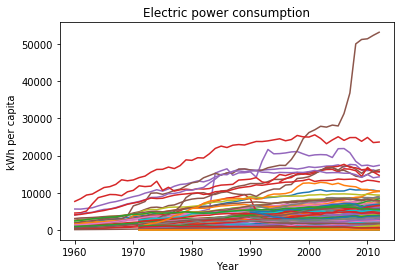

In [76]:
for country_name, country_data in el_power_consm_data_pivoted.groupby("country_name"):
    plt.plot(country_data["year"], country_data["Electric power consumption (kWh per capita)"])
    plt.title("Electric power consumption")
    plt.xlabel("Year")
    plt.ylabel("kWh per capita")

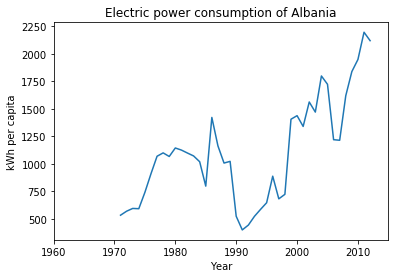

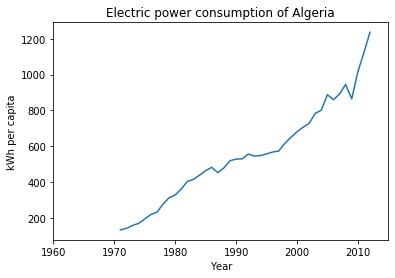

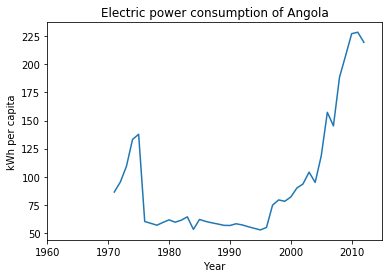

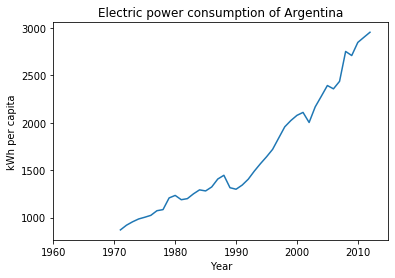

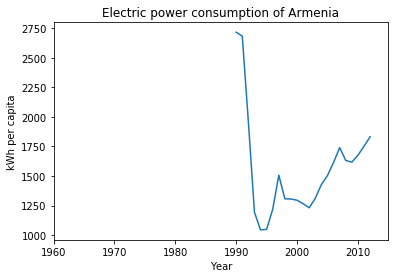

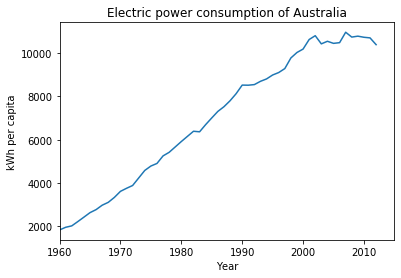

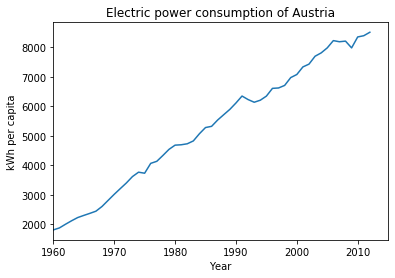

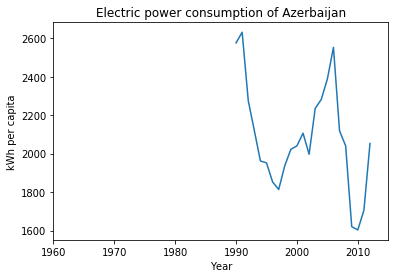

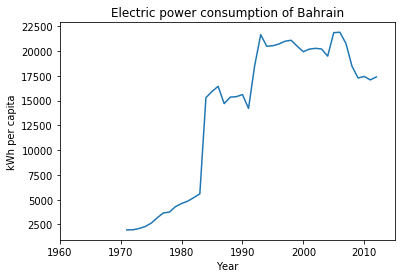

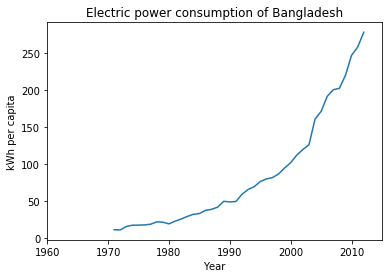

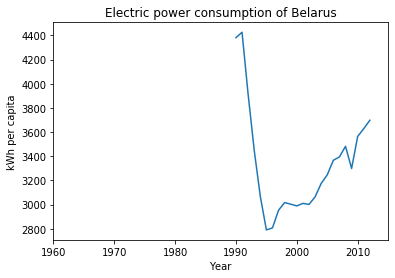

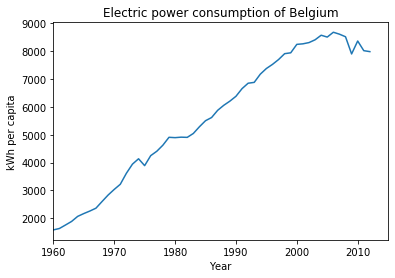

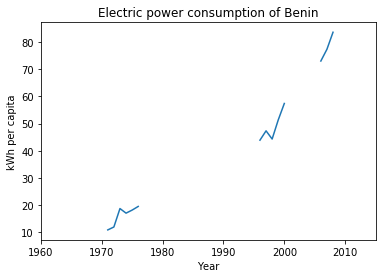

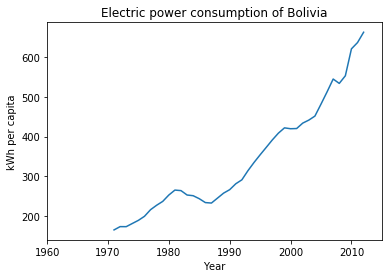

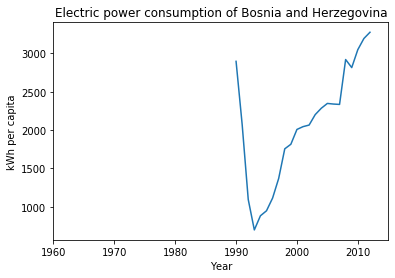

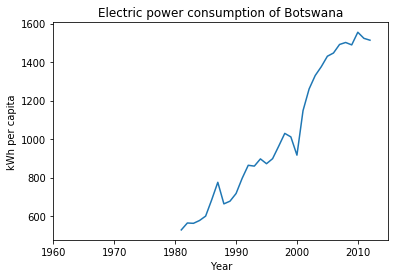

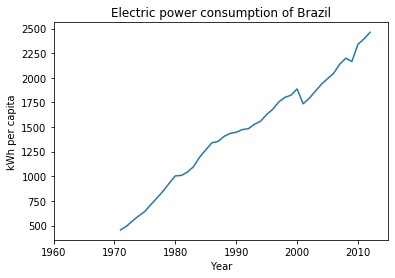

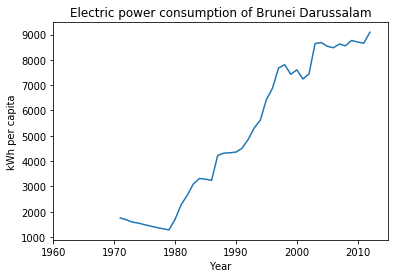

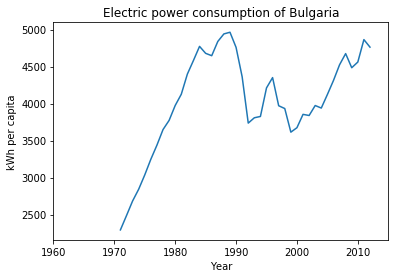

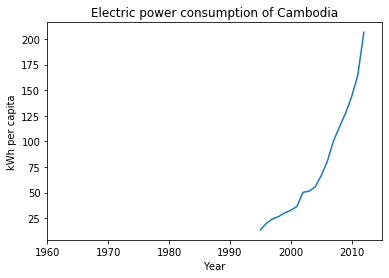

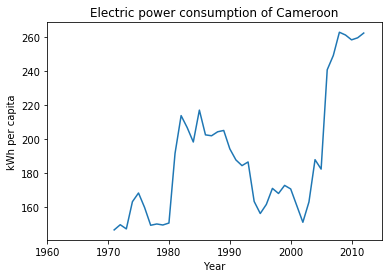

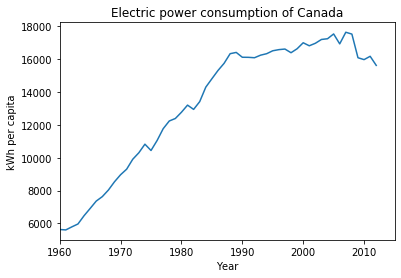

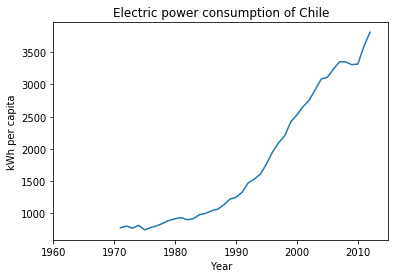

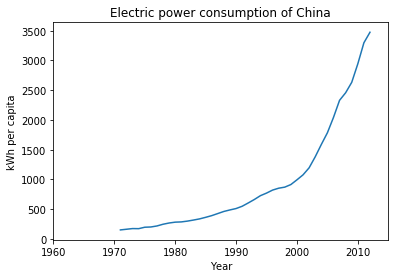

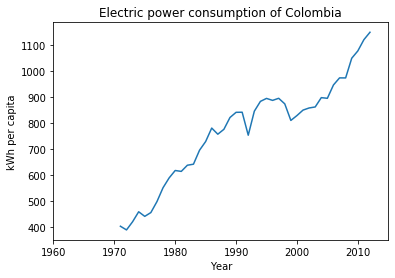

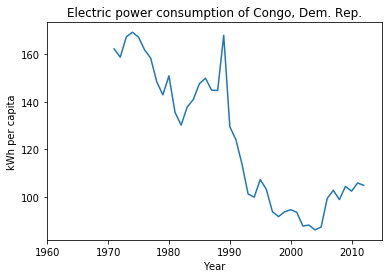

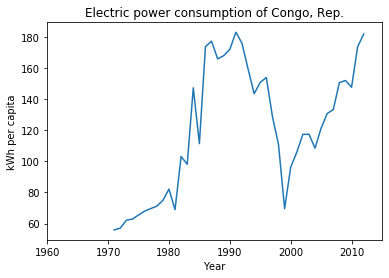

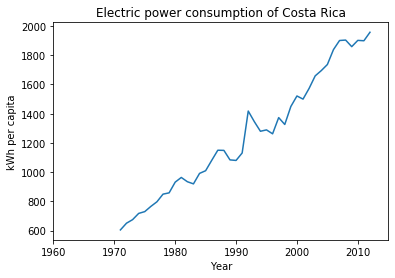

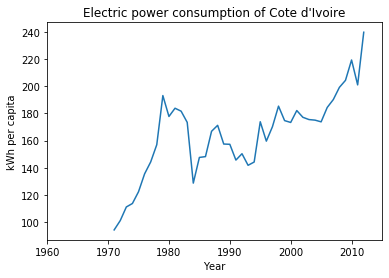

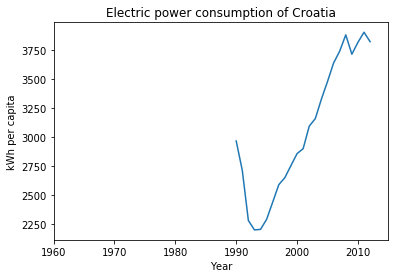

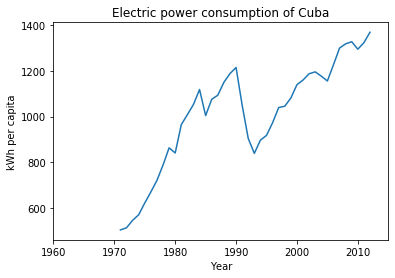

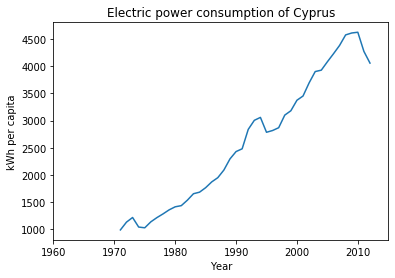

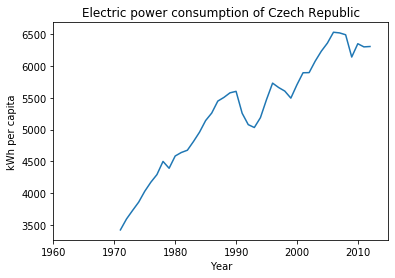

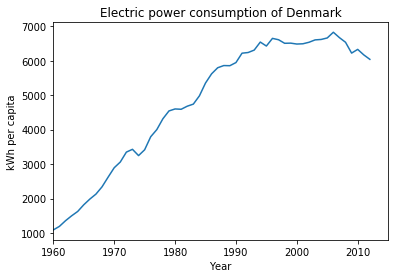

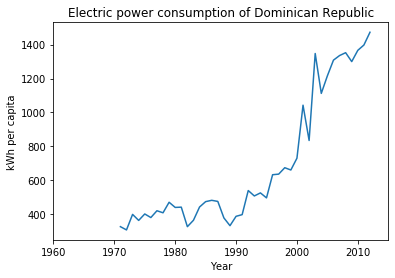

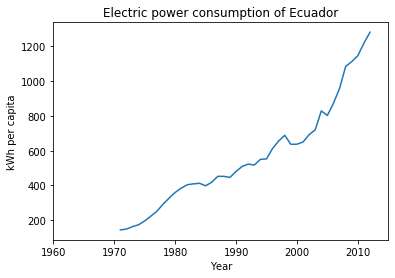

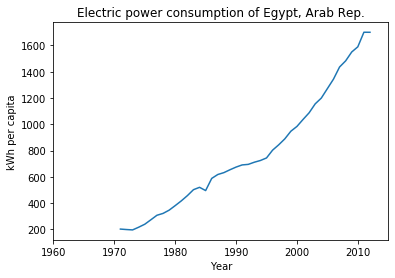

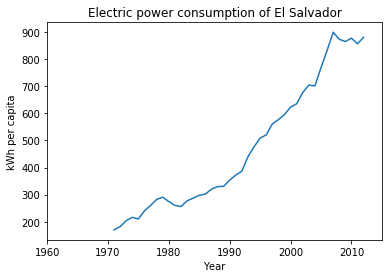

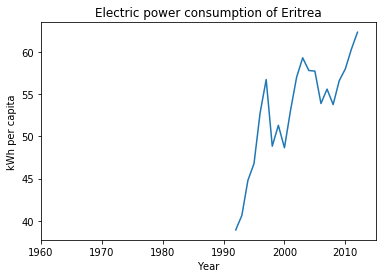

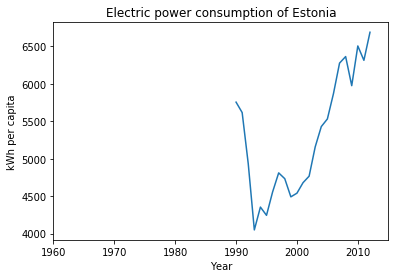

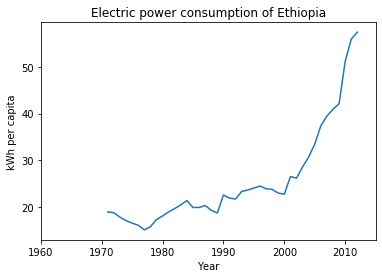

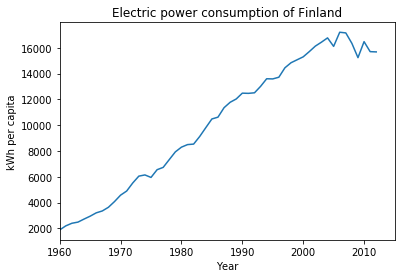

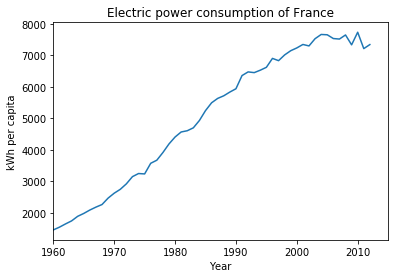

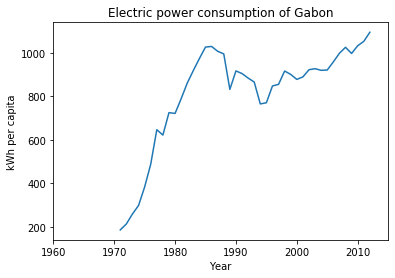

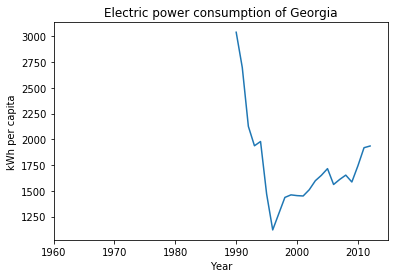

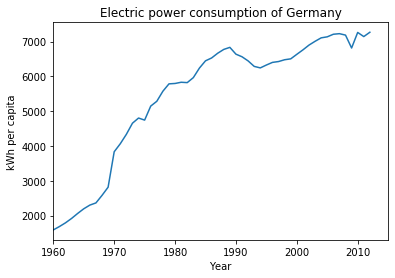

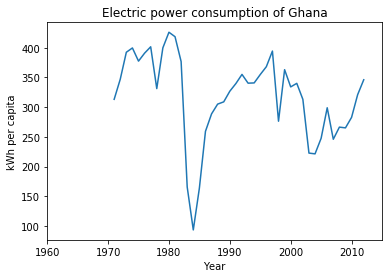

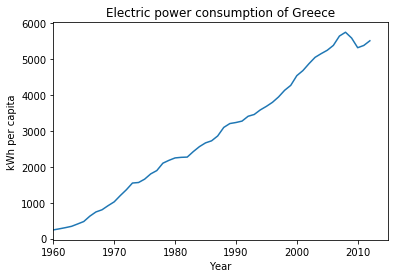

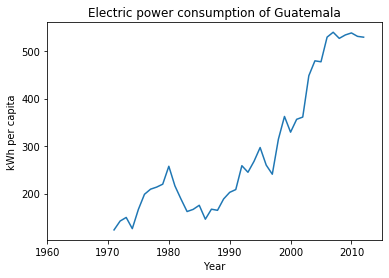

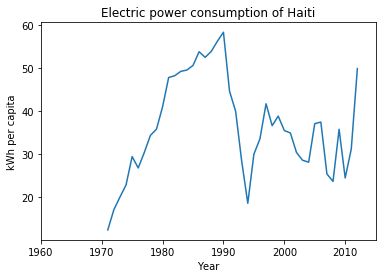

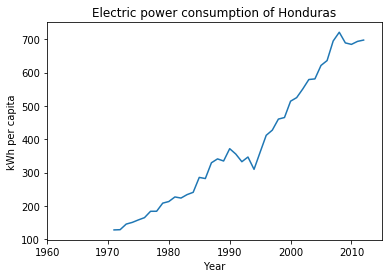

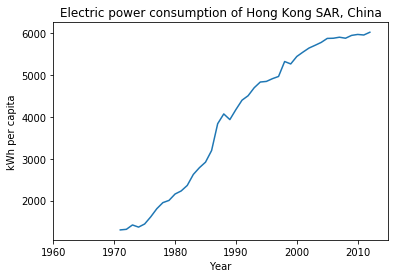

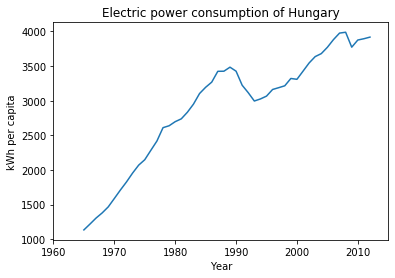

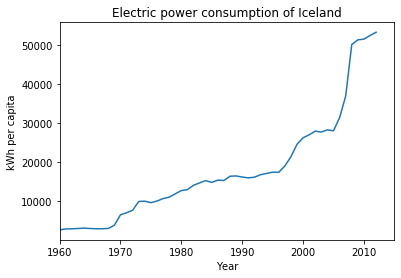

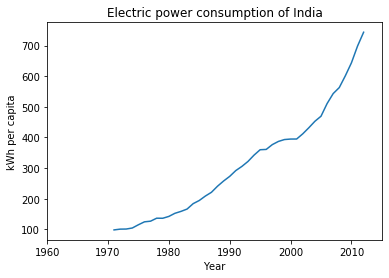

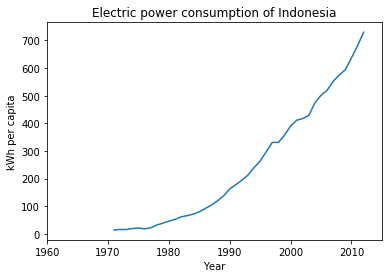

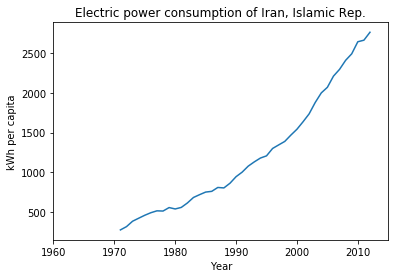

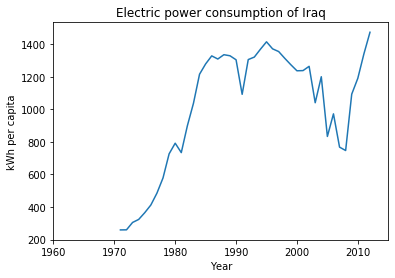

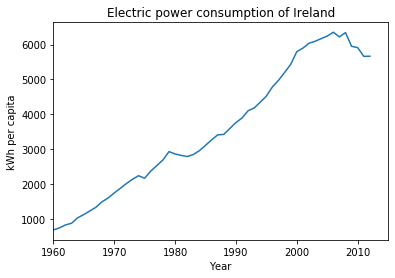

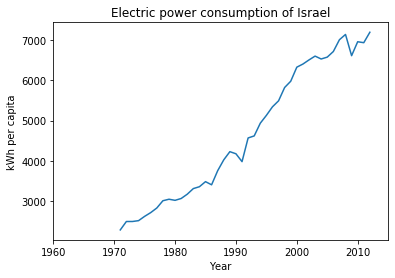

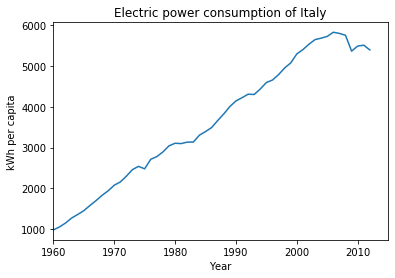

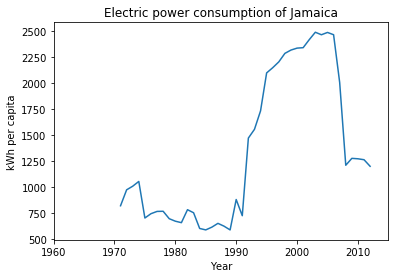

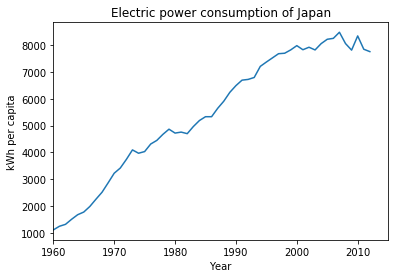

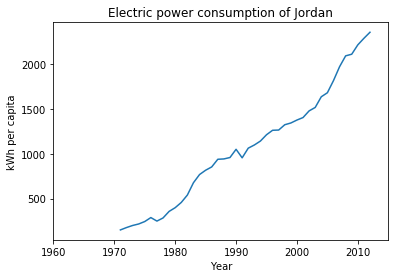

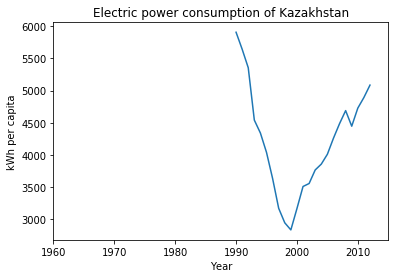

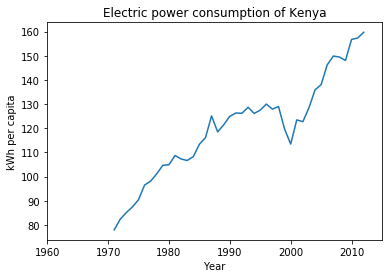

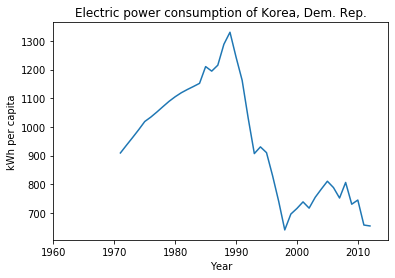

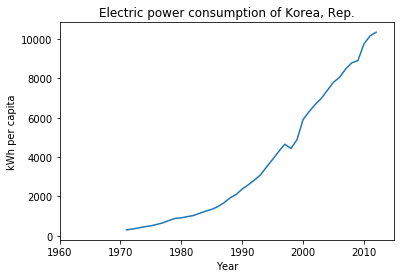

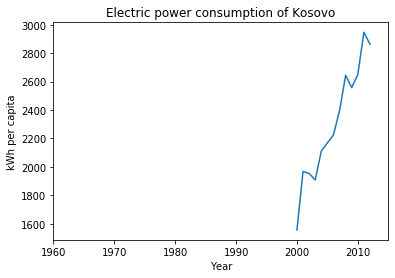

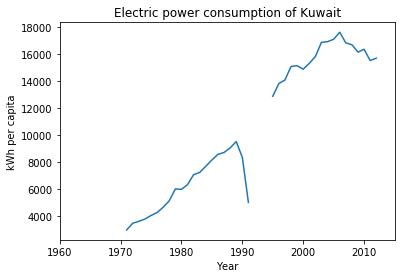

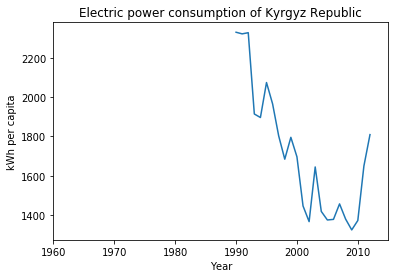

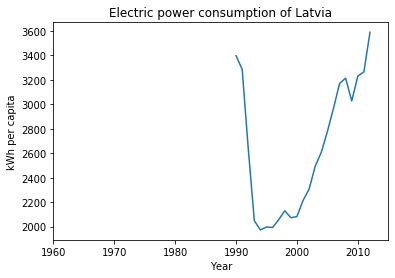

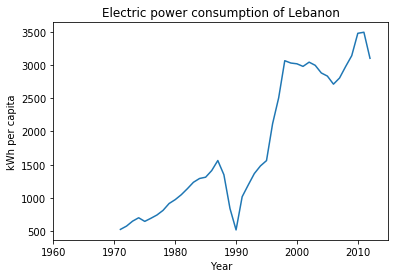

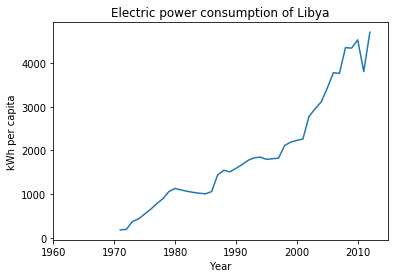

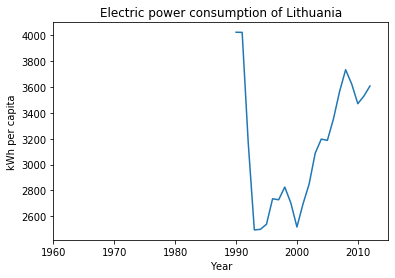

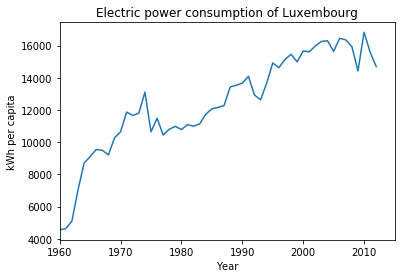

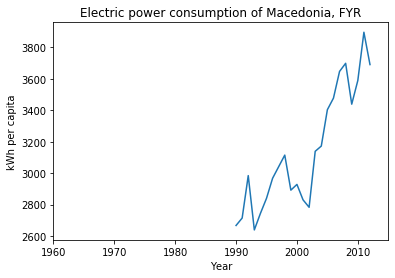

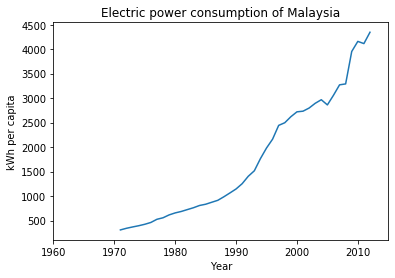

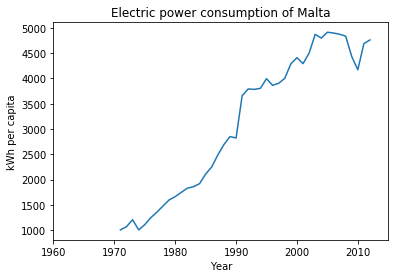

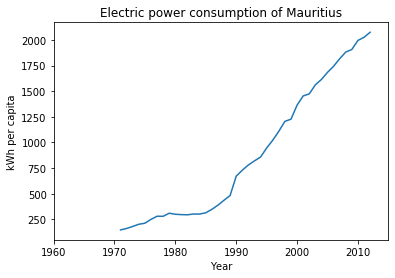

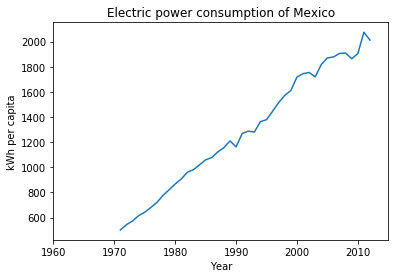

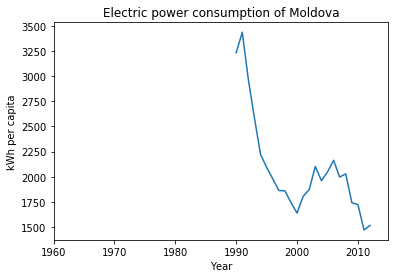

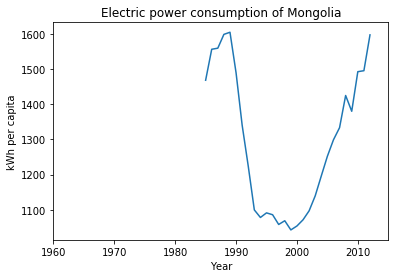

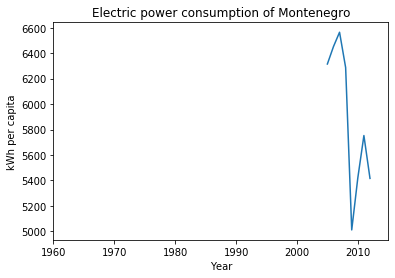

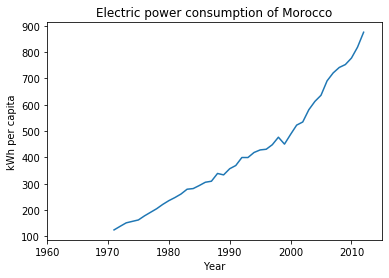

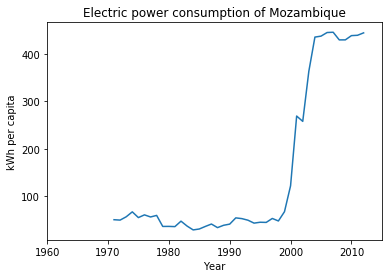

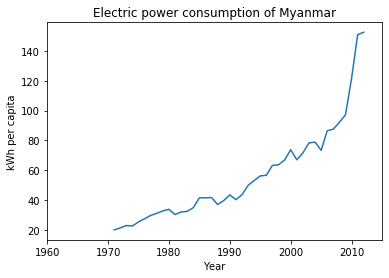

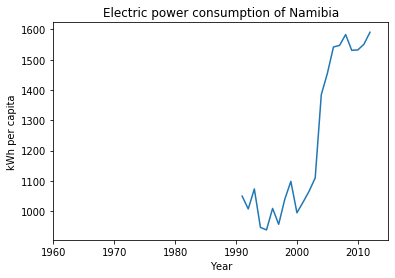

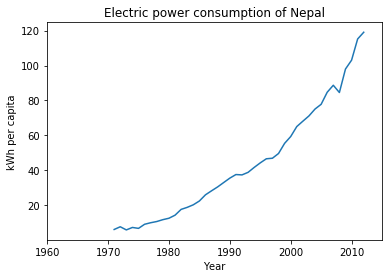

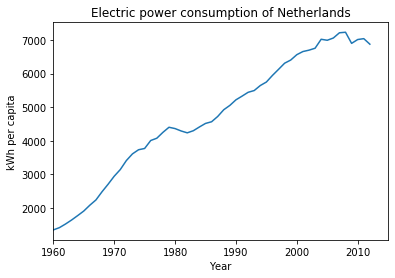

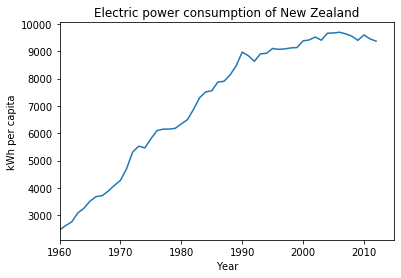

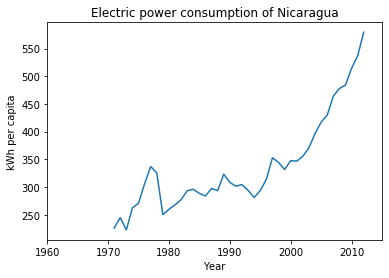

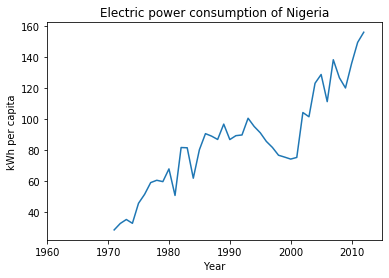

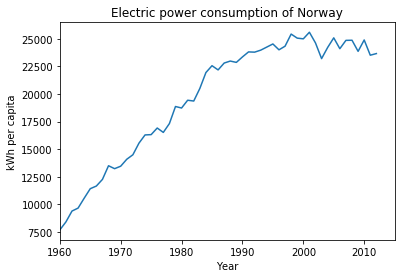

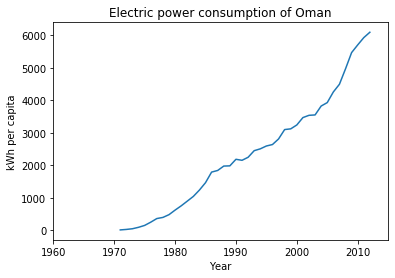

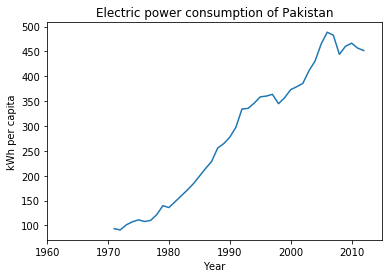

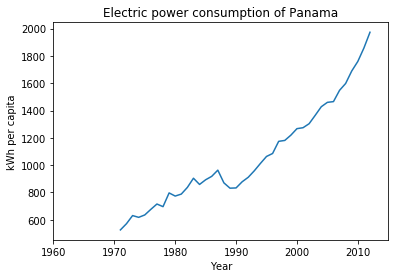

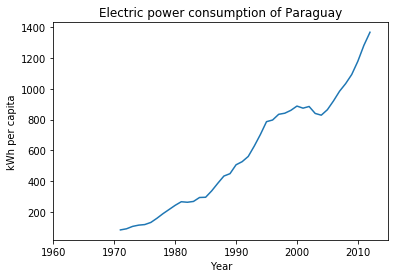

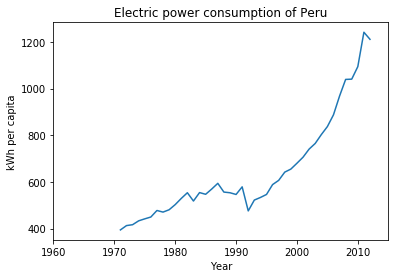

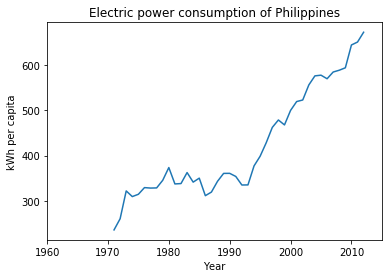

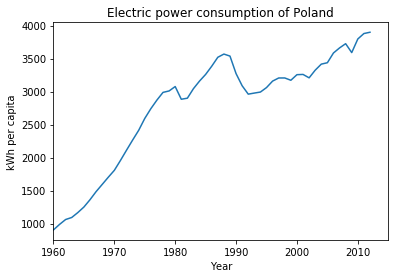

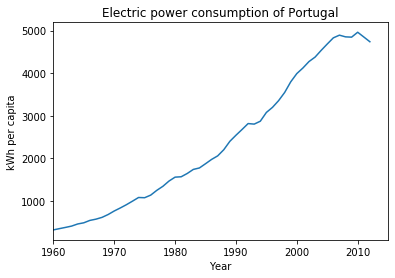

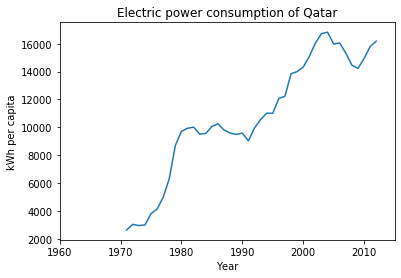

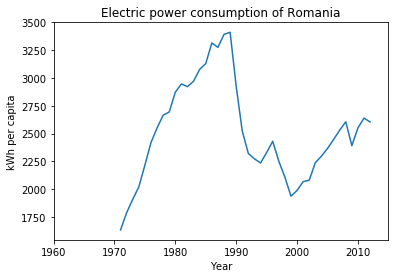

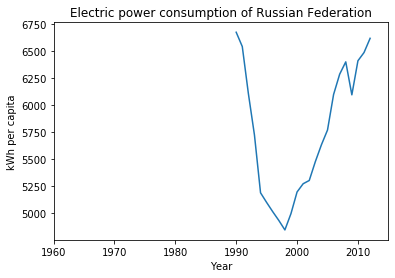

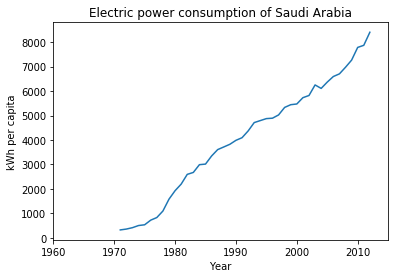

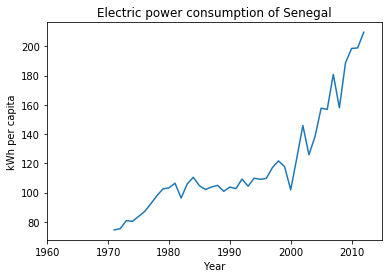

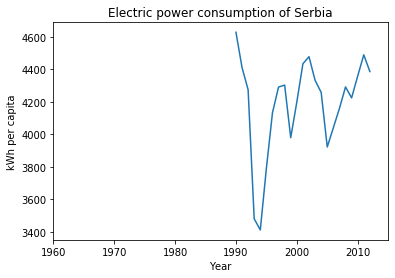

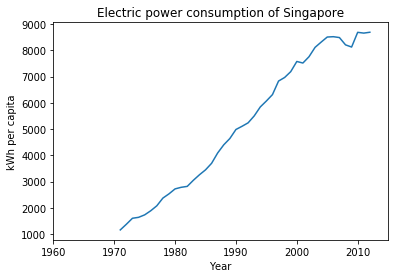

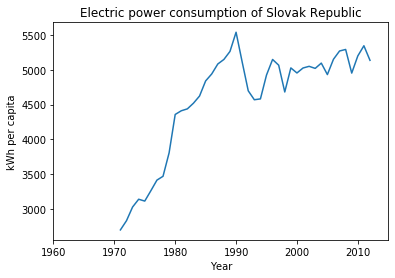

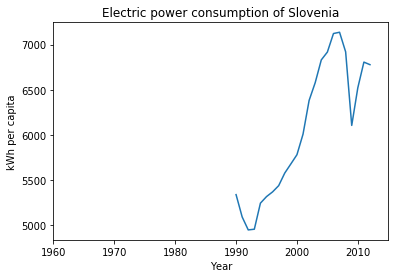

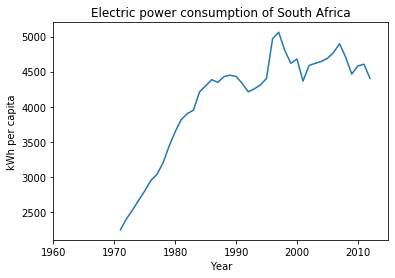

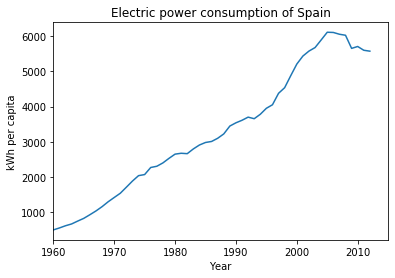

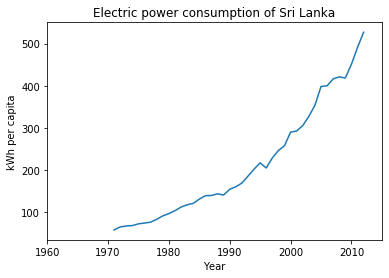

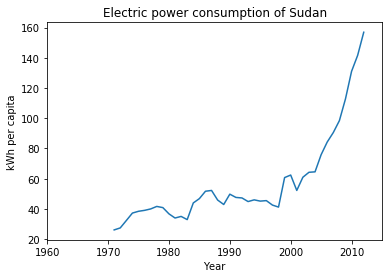

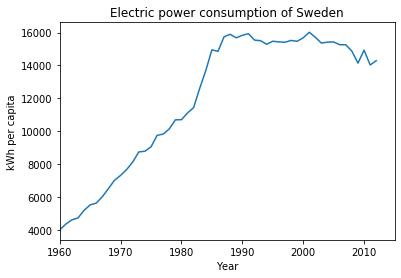

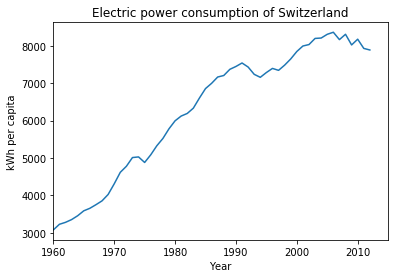

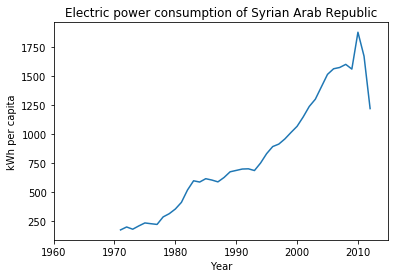

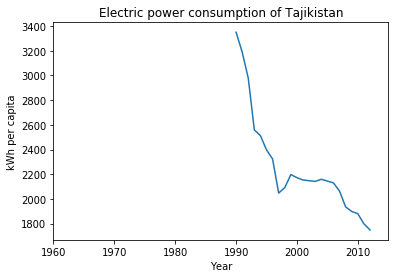

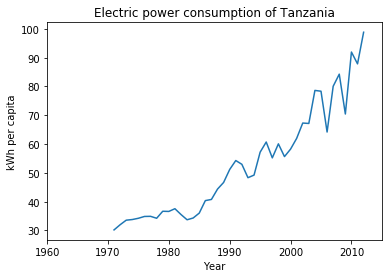

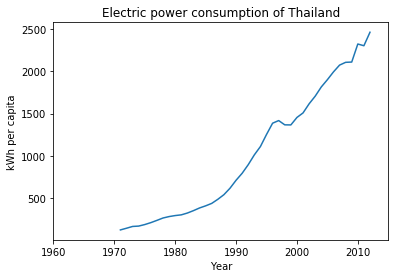

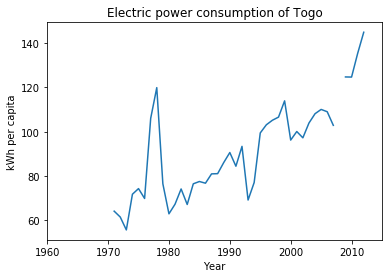

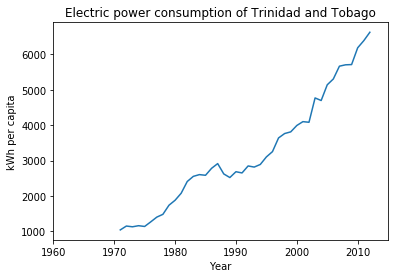

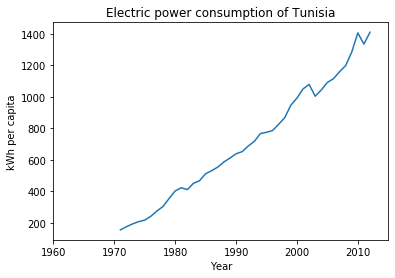

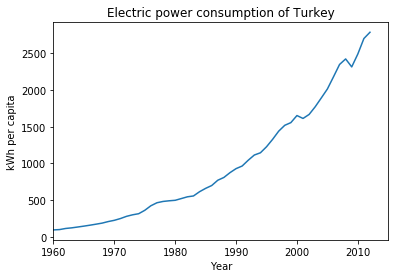

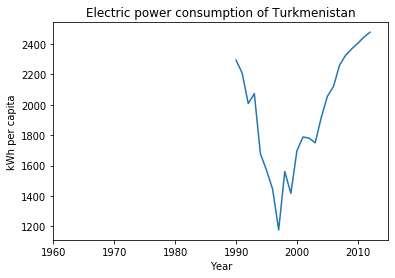

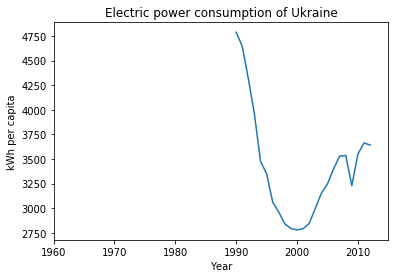

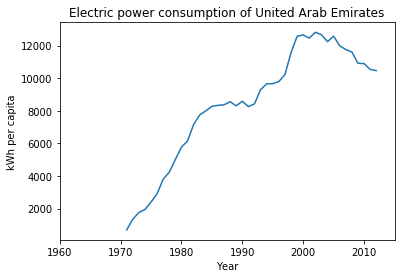

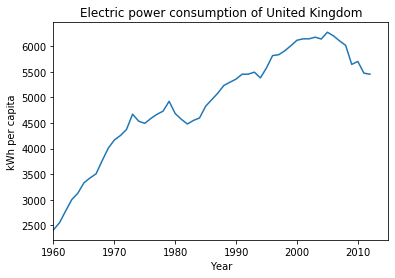

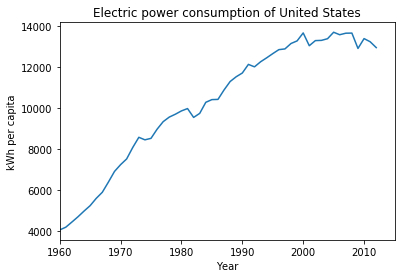

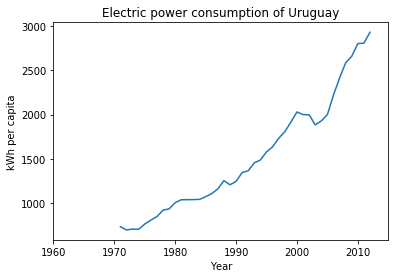

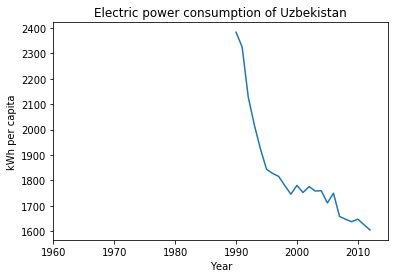

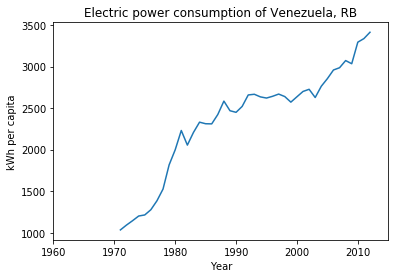

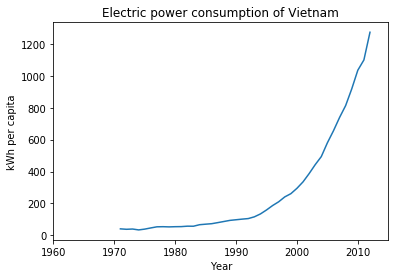

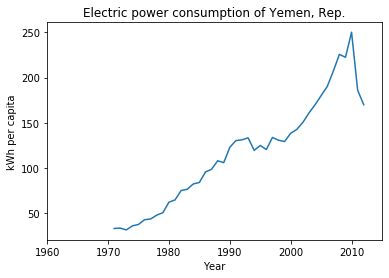

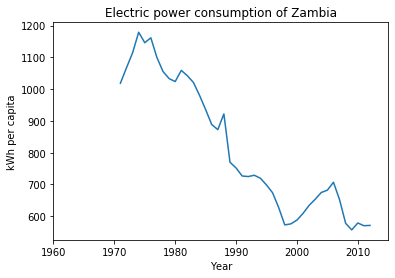

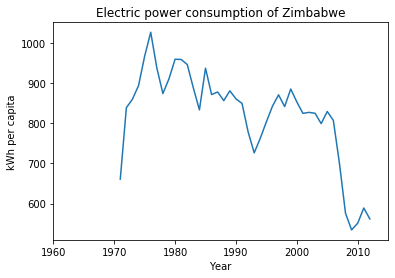

Countries with no info: Afghanistan, American Samoa, Andorra, Antigua and Barbuda, Aruba, Bahamas, The, Barbados, Belize, Bermuda, Bhutan, Burkina Faso, Burundi, Cabo Verde, Cayman Islands, Central African Republic, Chad, Channel Islands, Comoros, Curacao, Djibouti, Dominica, Equatorial Guinea, Faeroe Islands, Fiji, French Polynesia, Gambia, The, Greenland, Grenada, Guam, Guinea, Guinea-Bissau, Guyana, Isle of Man, Kiribati, Lao PDR, Lesotho, Liberia, Liechtenstein, Macao SAR, China, Madagascar, Malawi, Maldives, Mali, Marshall Islands, Mauritania, Micronesia, Fed. Sts., Monaco, New Caledonia, Niger, Northern Mariana Islands, Palau, Papua New Guinea, Puerto Rico, Rwanda, Samoa, San Marino, Sao Tome and Principe, Seychelles, Sierra Leone, Sint Maarten (Dutch part), Solomon Islands, Somalia, South Sudan, St. Kitts and Nevis, St. Lucia, St. Martin (French part), St. Vincent and the Grenadines, Suriname, Swaziland, Timor-Leste, Tonga, Turks and Caicos Islands, Tuvalu, Uganda, Vanuatu, Virg

In [77]:
max_year, min_year = el_power_consm_data_pivoted["year"].max(), el_power_consm_data_pivoted["year"].min()
countries_with_no_data = []

for country_name, country_data in el_power_consm_data_pivoted.groupby("country_name"):
    if country_data["Electric power consumption (kWh per capita)"].isnull().all():
        countries_with_no_data.append(country_name)
        continue
    plt.plot(country_data["year"], country_data["Electric power consumption (kWh per capita)"])
    plt.title(f"Electric power consumption of {country_name}")
    plt.xlabel("Year")
    plt.ylabel("kWh per capita")
    plt.xlim((min_year, max_year))
    plt.show()
    
print(f"Countries with no info: {', '.join(countries_with_no_data)}")

Above are listed the countries that have no data. Also tried facet plot, first time I tried it did not work, but now it works almost perfectly.

In [78]:
def plot_indicator_values_by_year(df, indicator):
    g = sns.FacetGrid(df, col="country_name", col_wrap=4)
    g = g.map(plt.plot, "year", indicator)

Countries with kWh per capita bigger than 10_000 are printed.

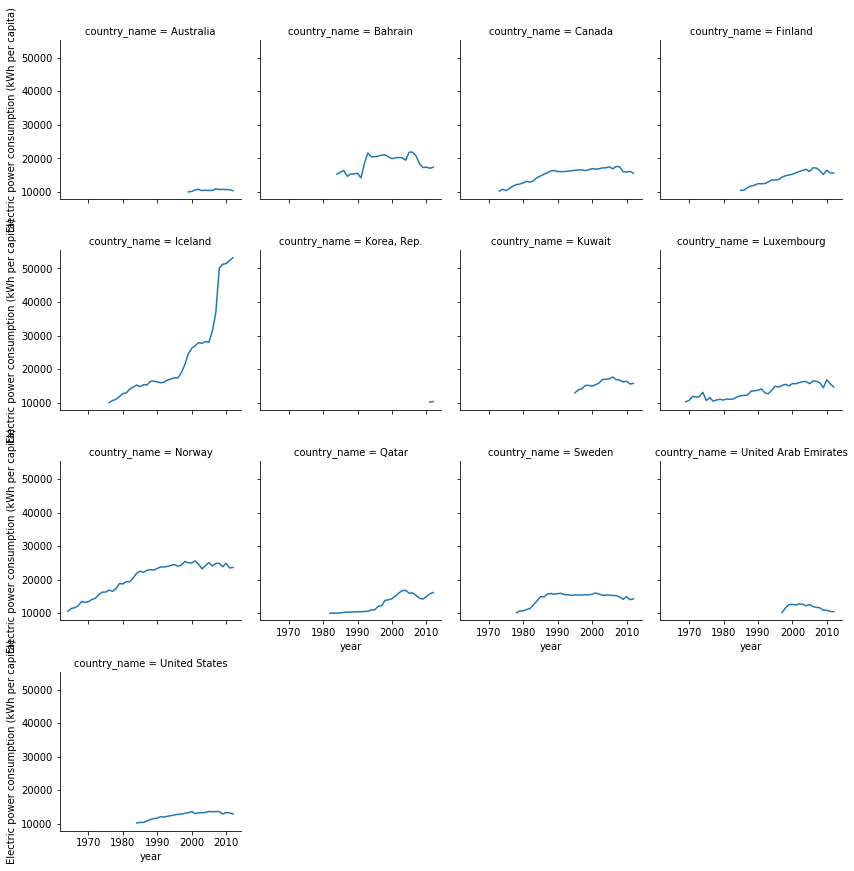

In [79]:
plot_indicator_values_by_year(el_power_consm_data_pivoted[el_power_consm_data_pivoted["Electric power consumption (kWh per capita)"] > 10_000], "Electric power consumption (kWh per capita)")

This looks ok, but I have no idea how to fix the overlapping ylabels...

Is there a correlation between energy consumption and the technological advancement of an income group. If a nation is technologically advanced, it export tech to other countries for profit.

In [80]:
for group_name, group_data in el_power_consm_data_pivoted.groupby("income_group"):
    print(group_name, group_data["Electric power consumption (kWh per capita)"].corr(group_data["High-technology exports (% of manufactured exports)"]))

High income 0.09708901607185756
Low income 0.13052378236192
Lower middle income 0.019184345265332265
Upper middle income 0.0942806885955907


There is not a very strong correlation between tech export and power consumption.

In [81]:
# el_power_consm_data_pivoted["Electric power consumption (kWh per capita)"].corr(el_power_consm_data_pivoted["High-technology exports (% of manufactured exports)"])

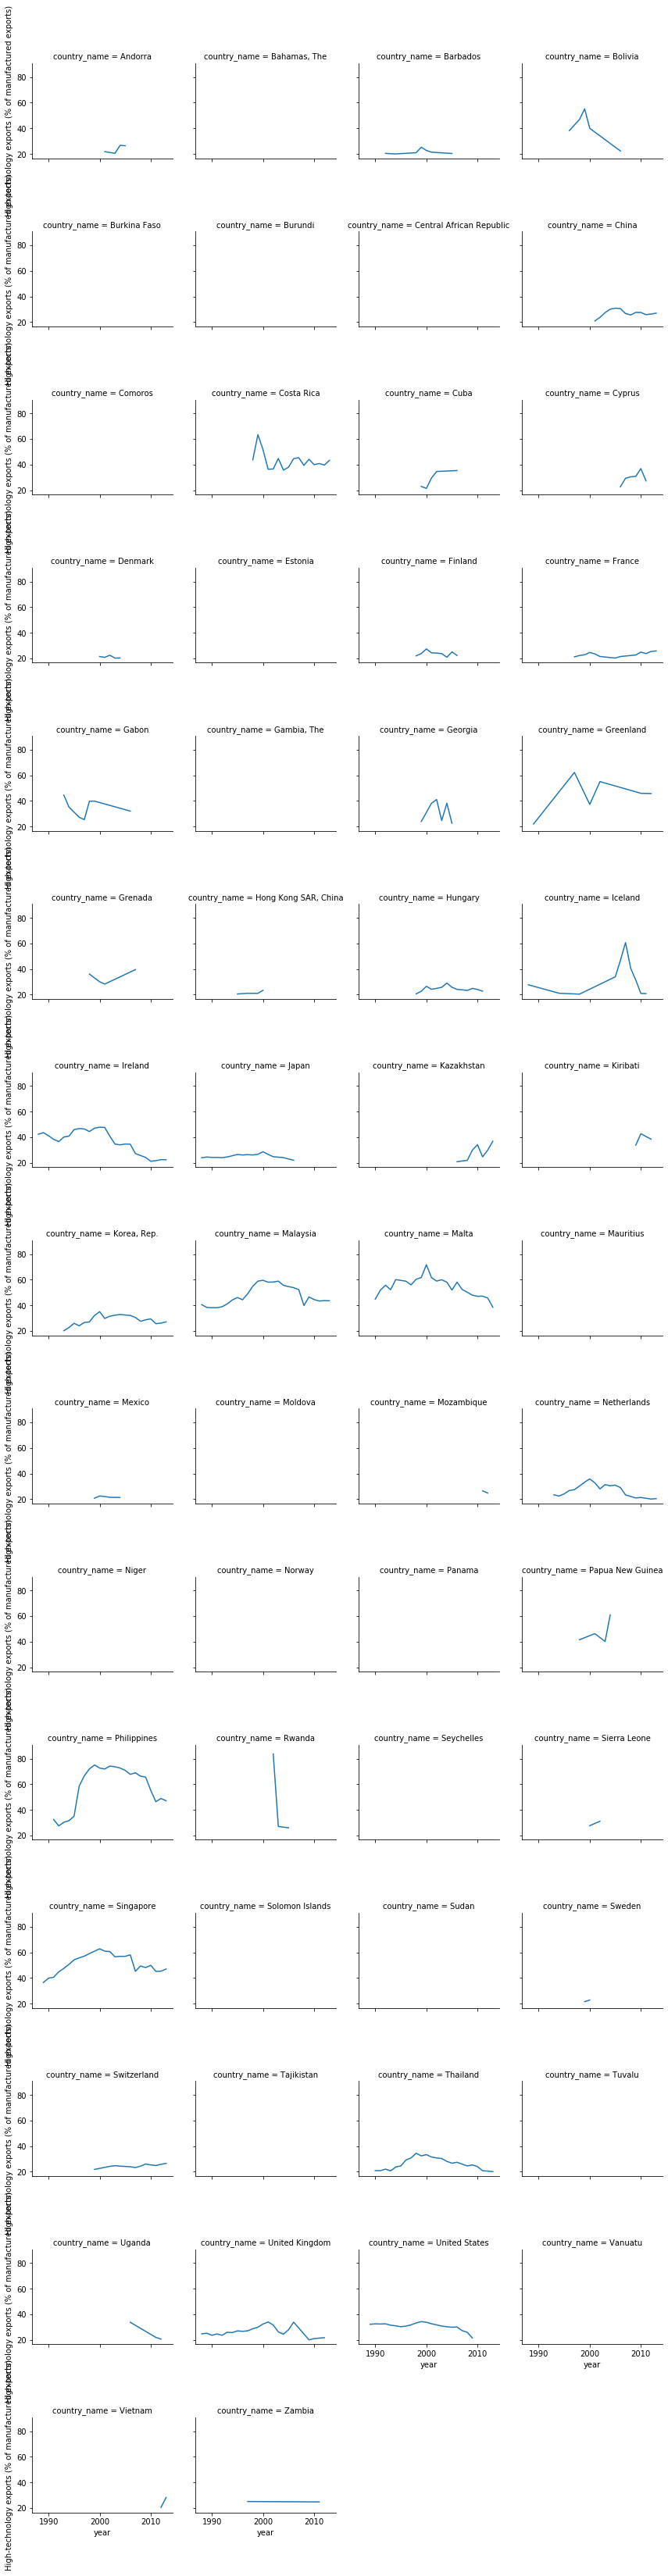

In [82]:
plot_indicator_values_by_year(el_power_consm_data_pivoted[el_power_consm_data_pivoted["High-technology exports (% of manufactured exports)"] > 20], "High-technology exports (% of manufactured exports)")

What is the distribution of energy in each category for each year?

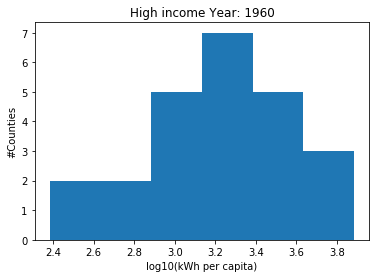

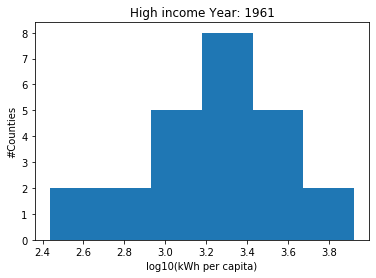

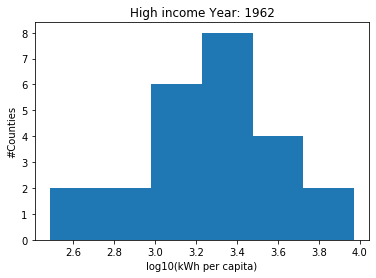

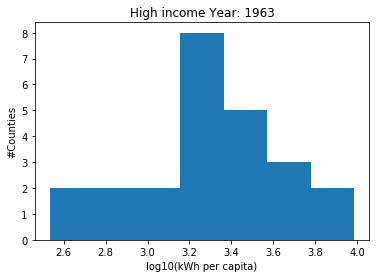

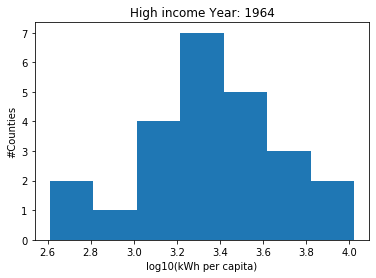

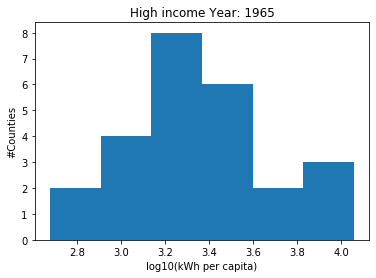

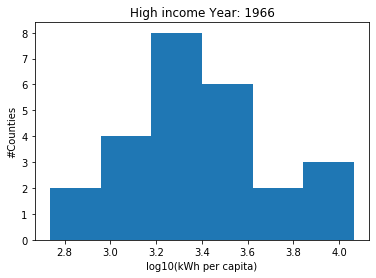

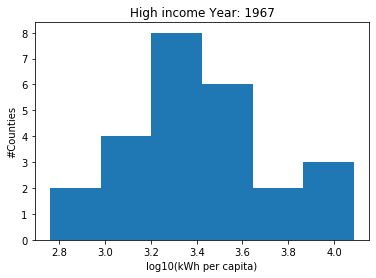

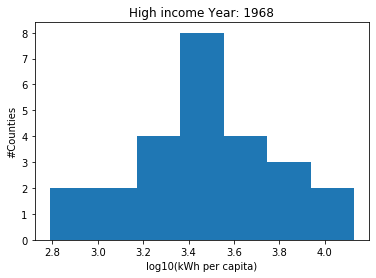

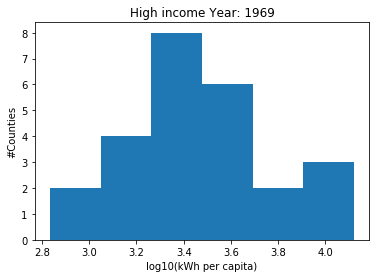

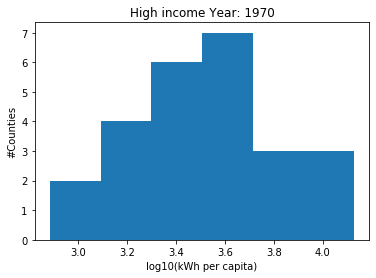

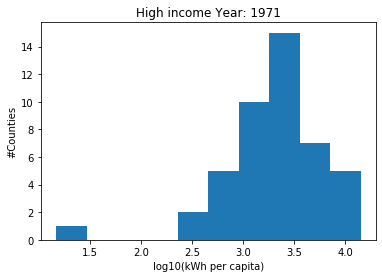

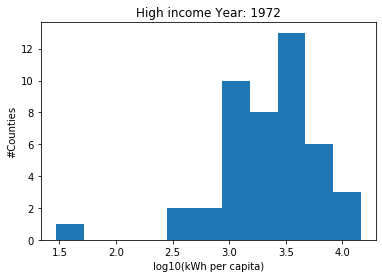

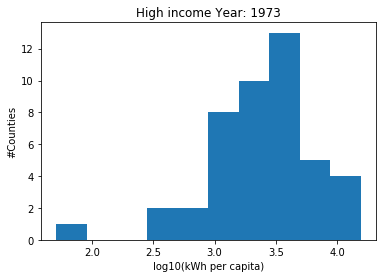

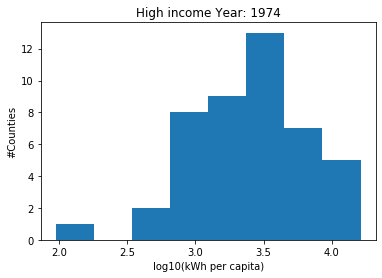

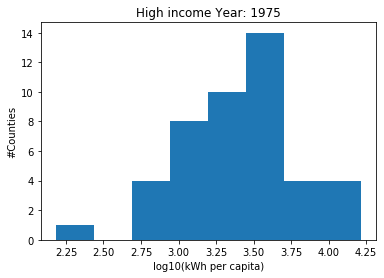

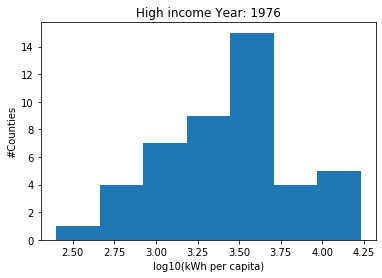

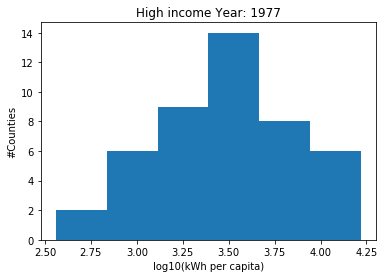

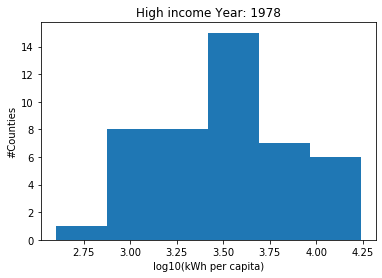

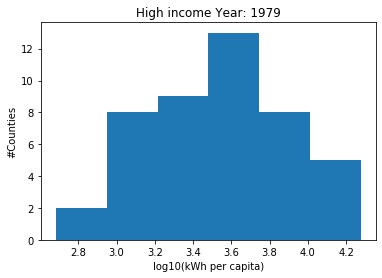

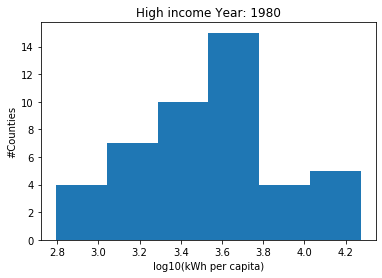

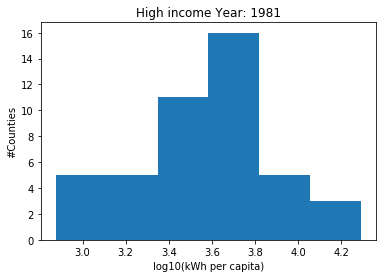

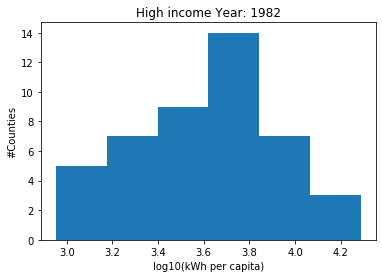

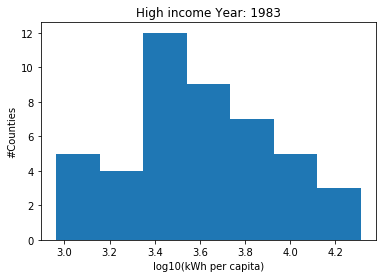

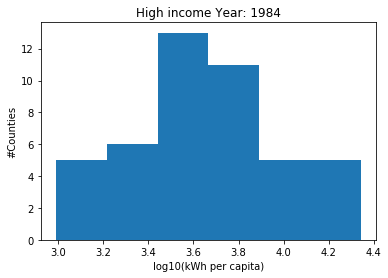

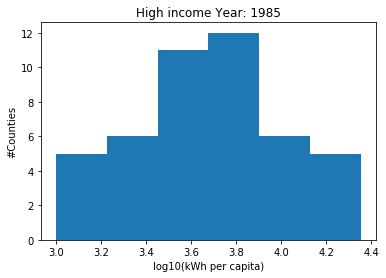

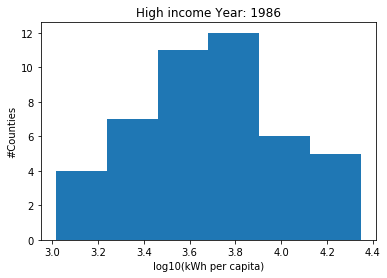

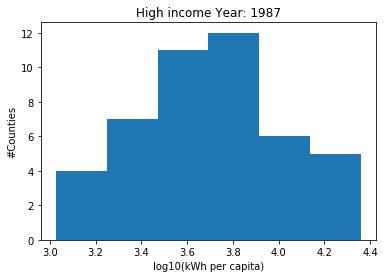

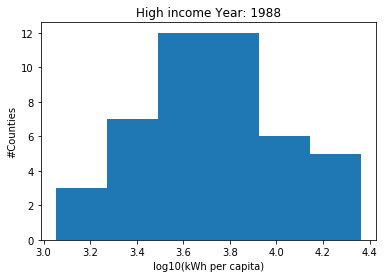

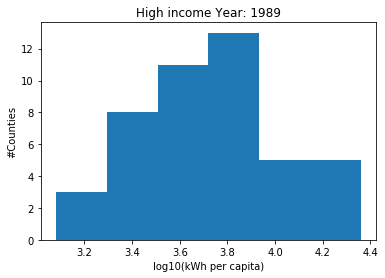

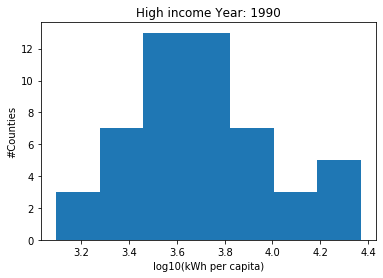

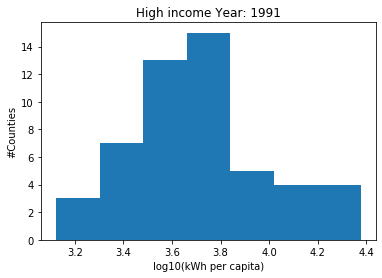

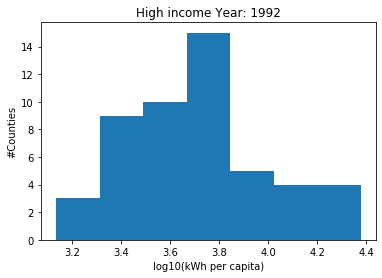

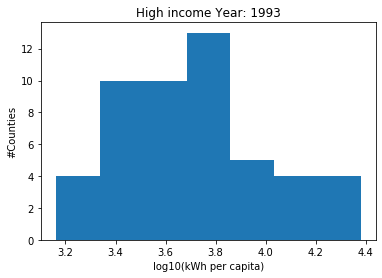

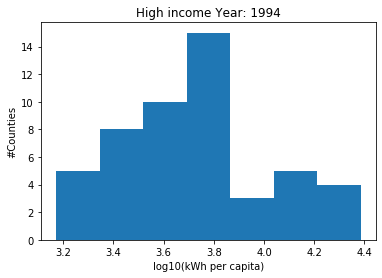

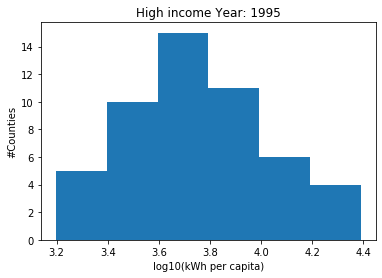

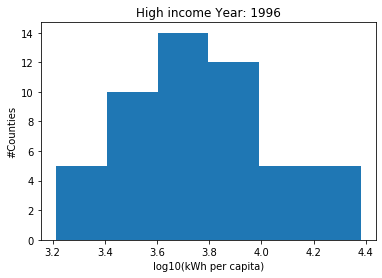

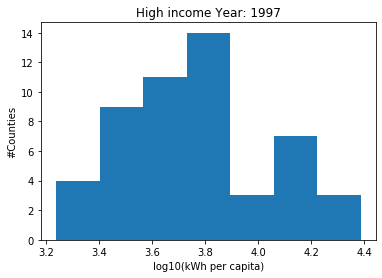

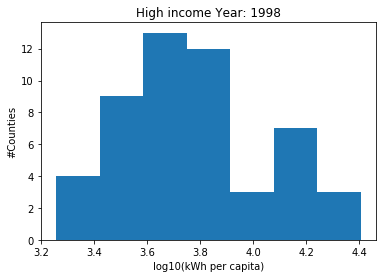

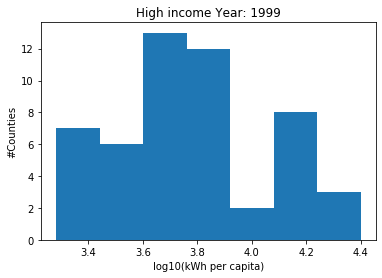

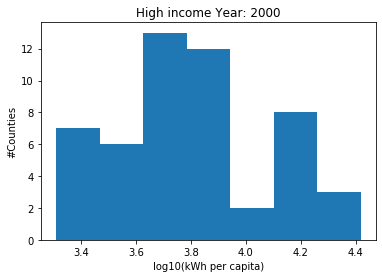

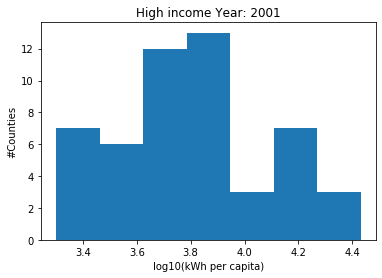

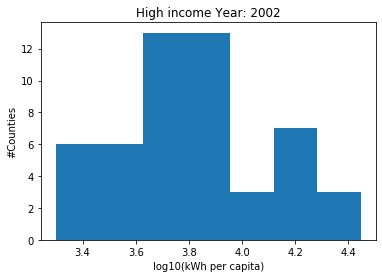

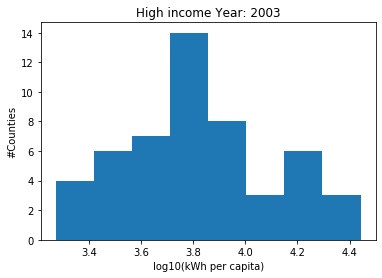

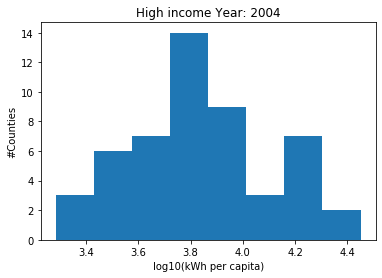

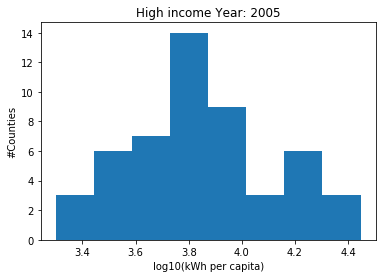

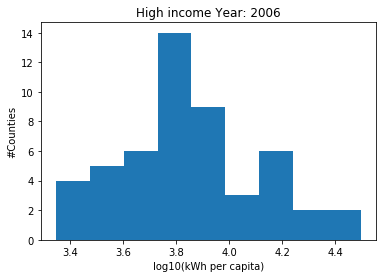

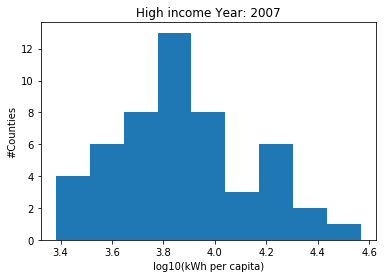

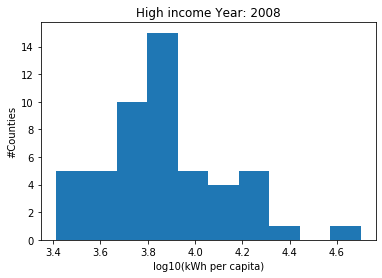

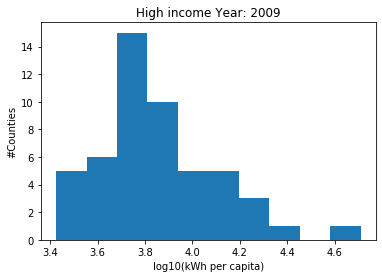

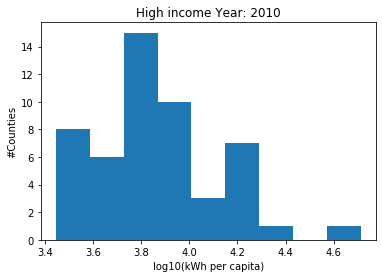

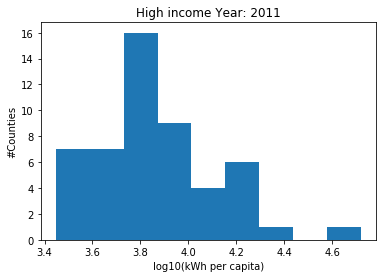

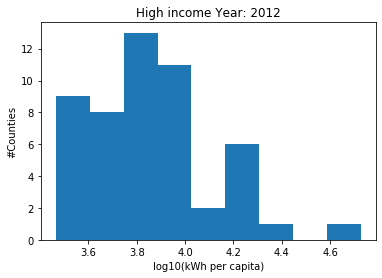

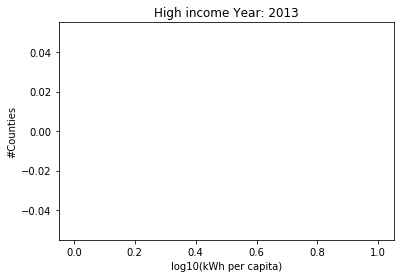

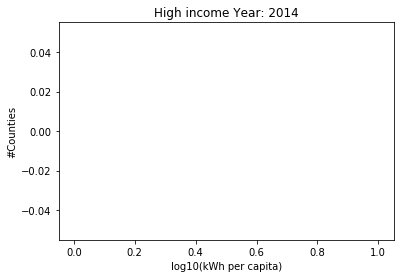

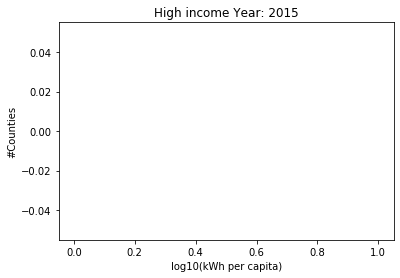

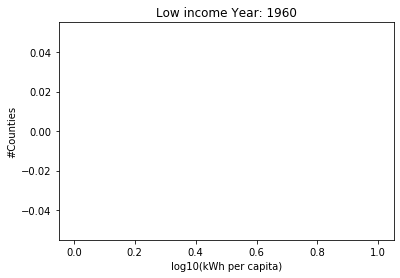

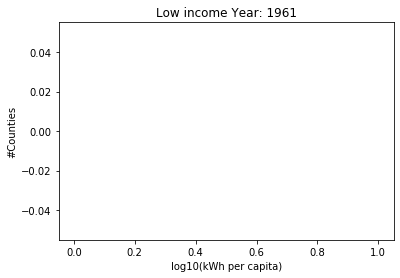

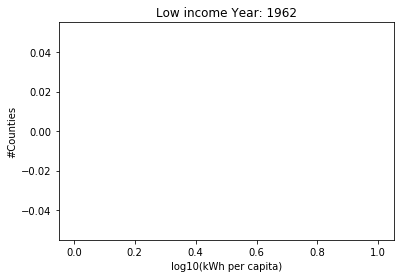

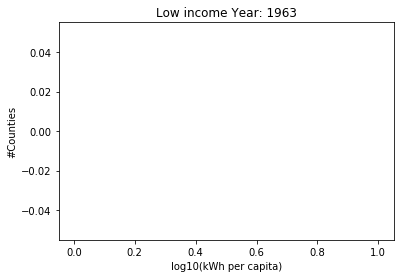

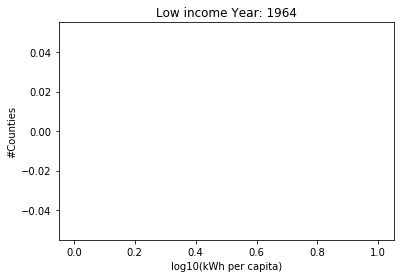

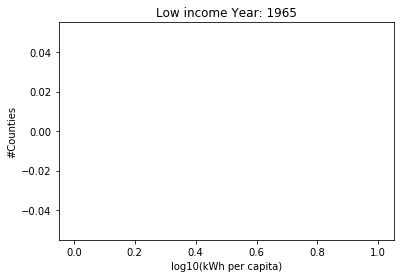

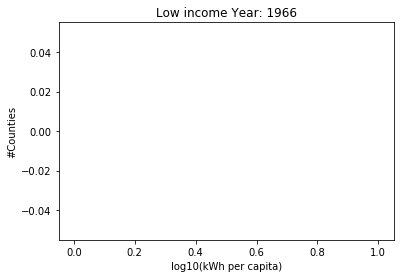

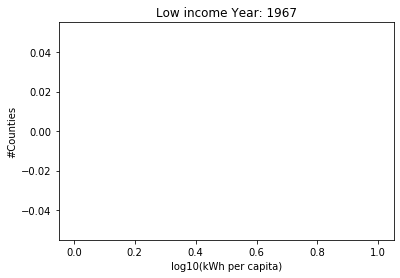

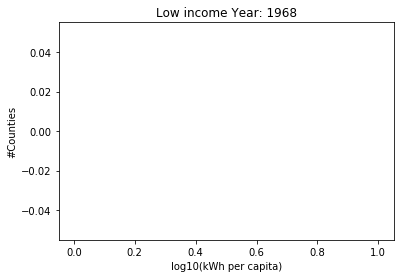

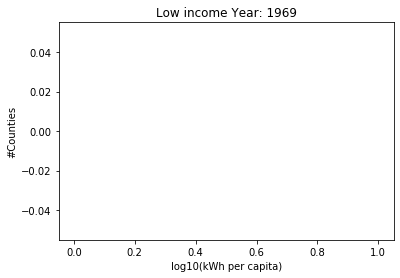

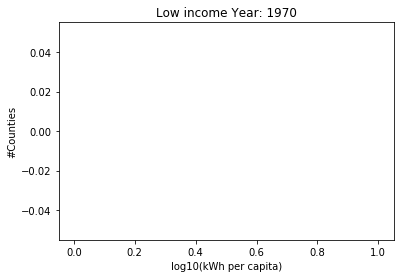

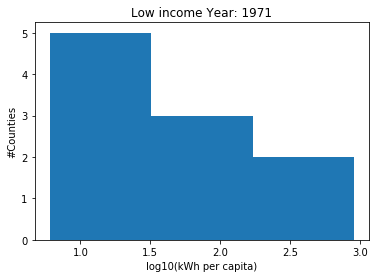

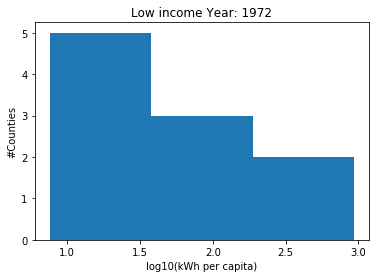

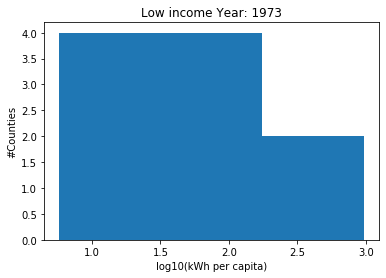

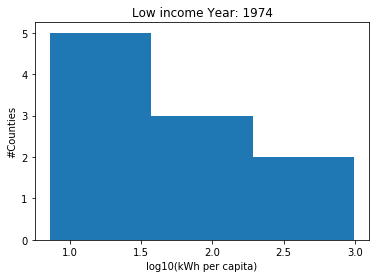

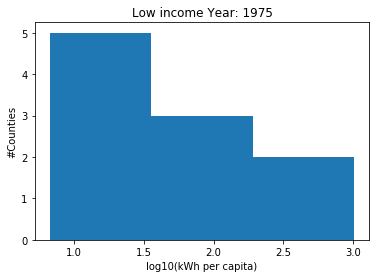

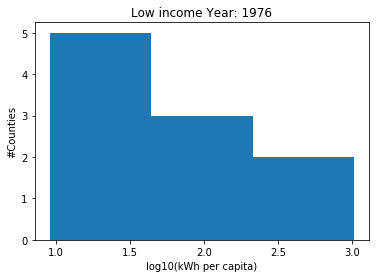

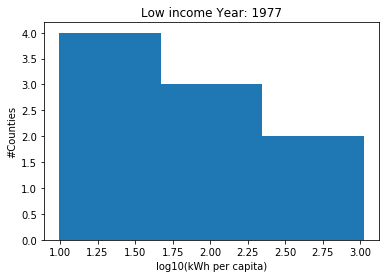

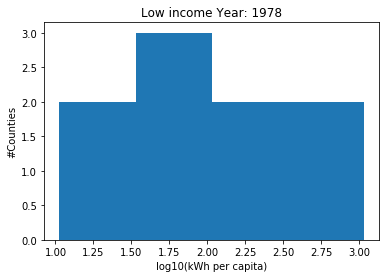

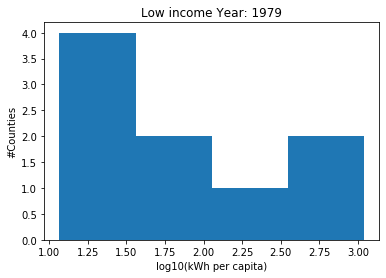

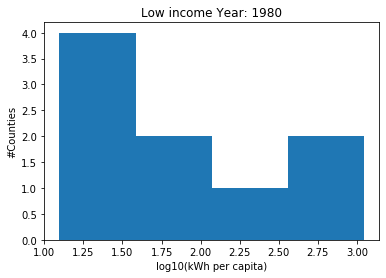

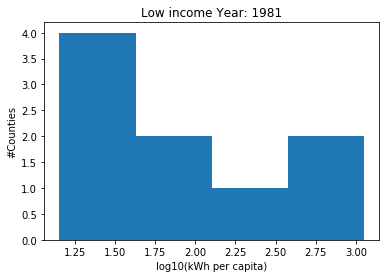

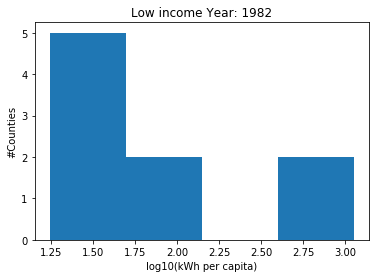

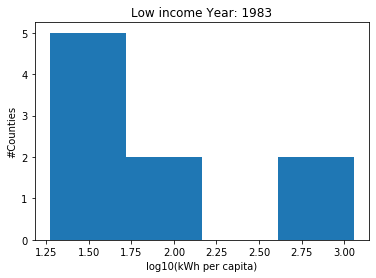

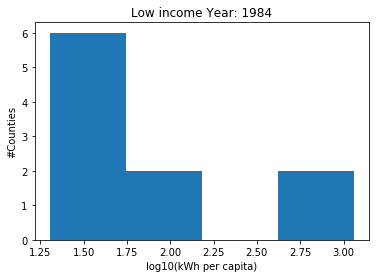

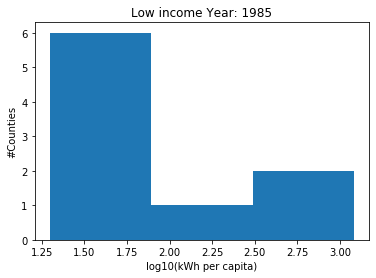

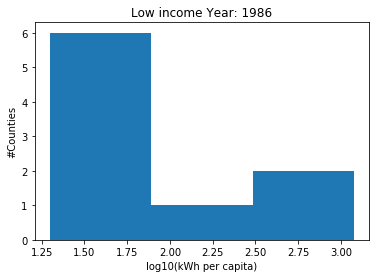

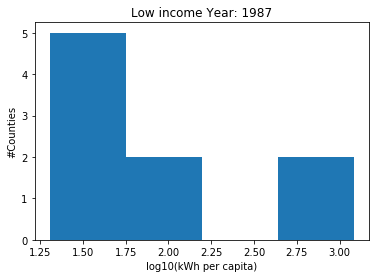

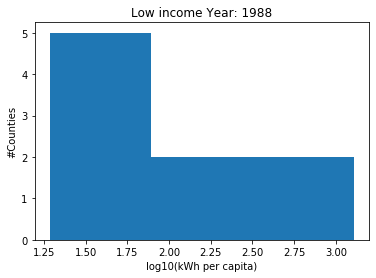

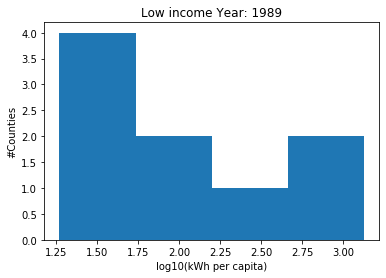

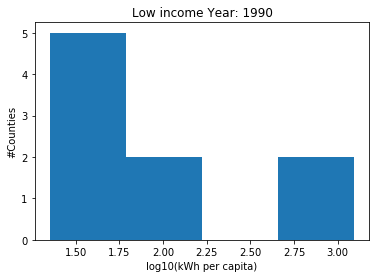

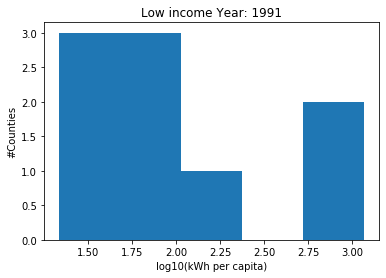

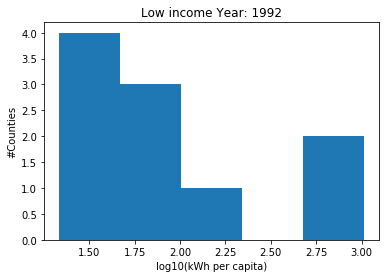

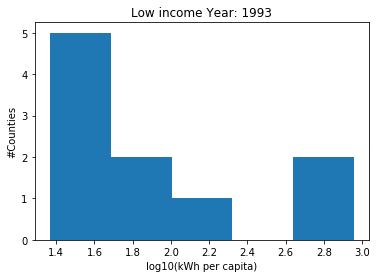

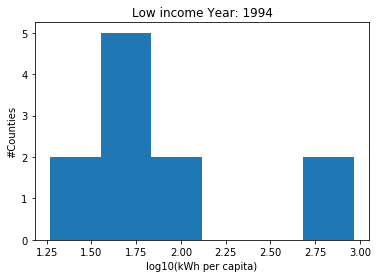

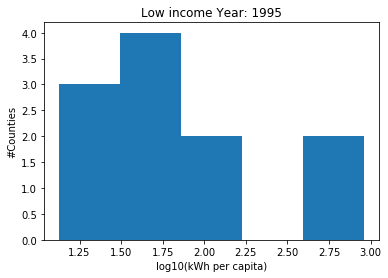

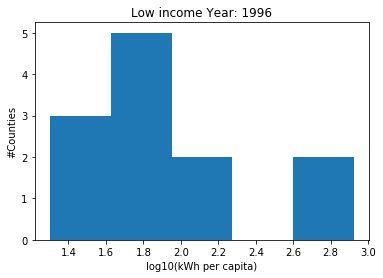

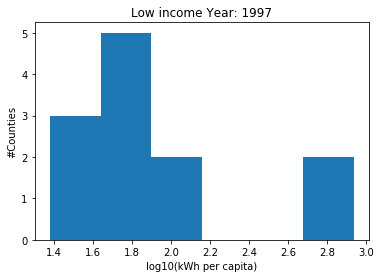

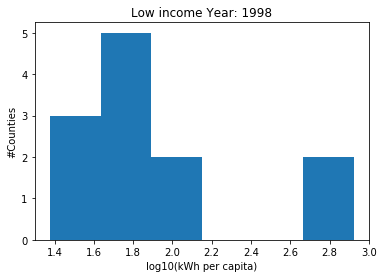

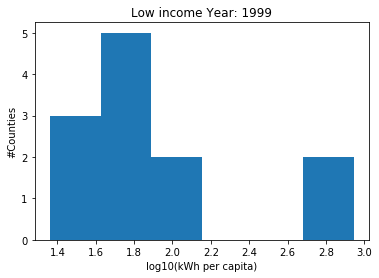

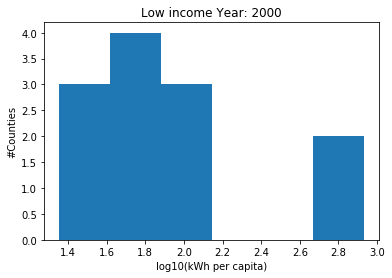

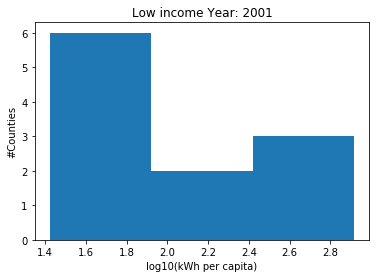

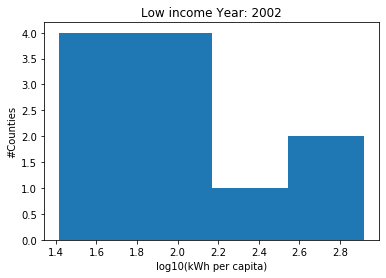

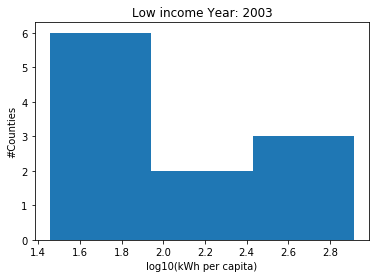

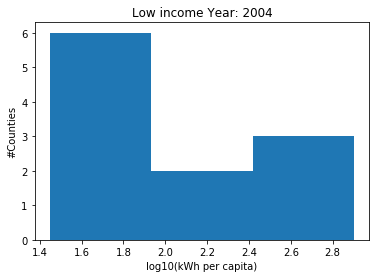

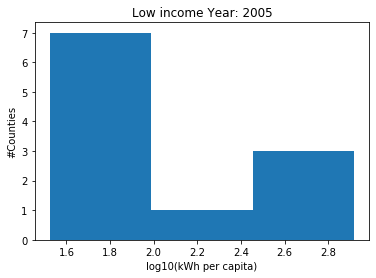

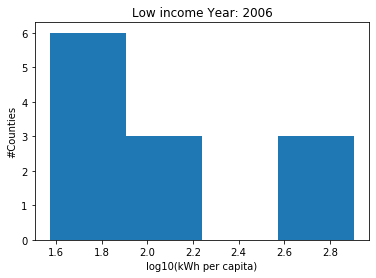

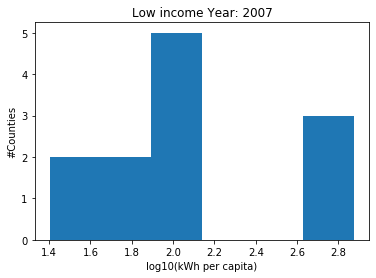

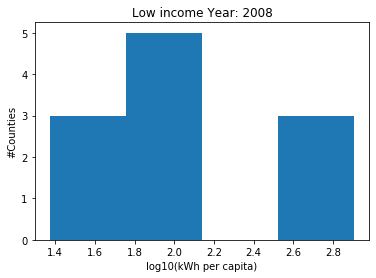

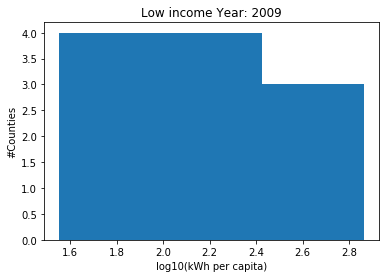

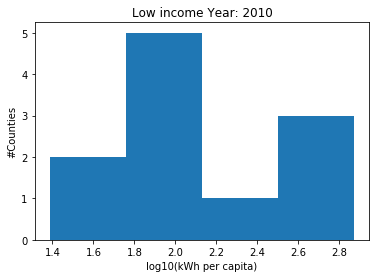

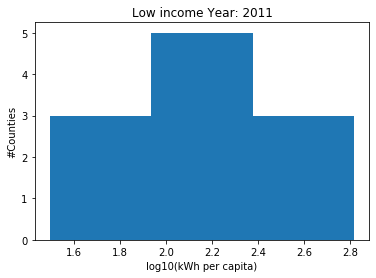

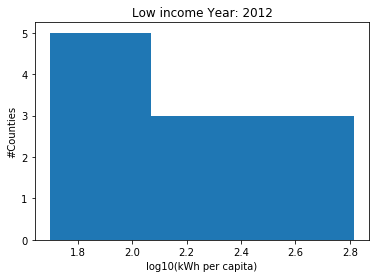

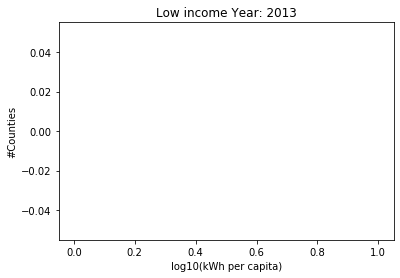

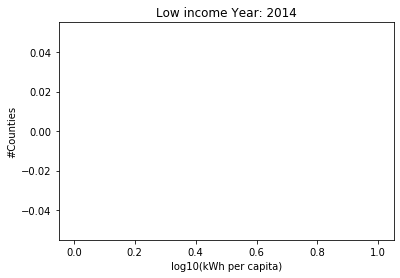

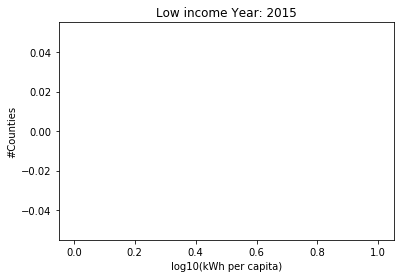

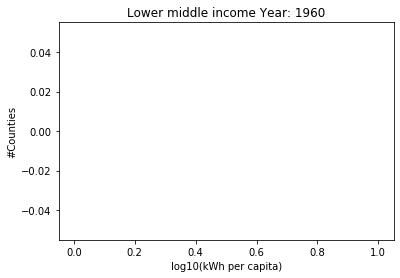

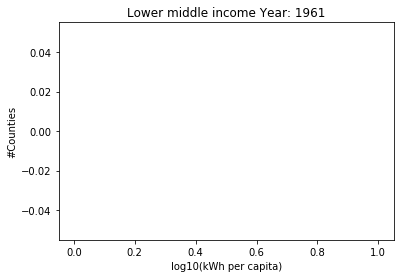

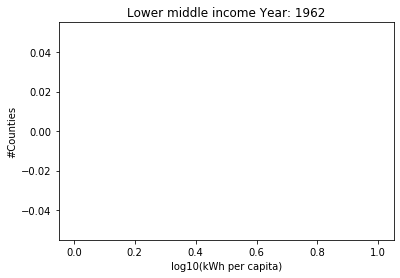

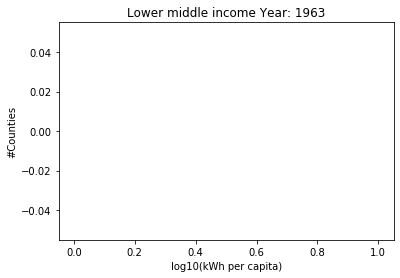

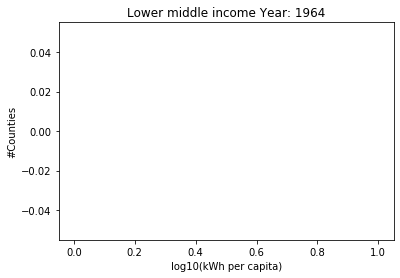

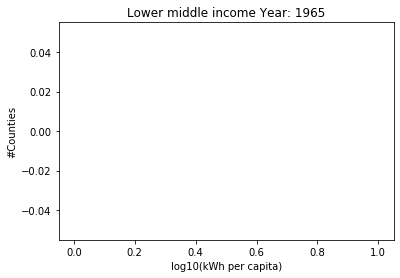

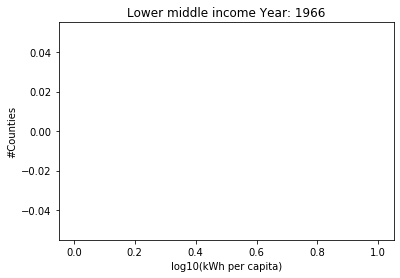

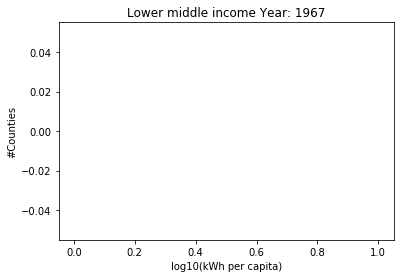

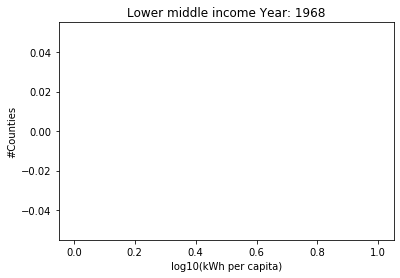

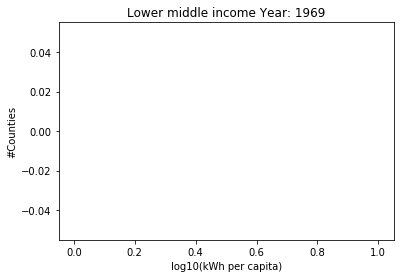

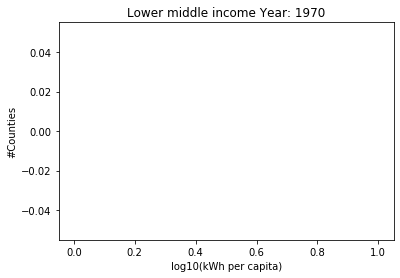

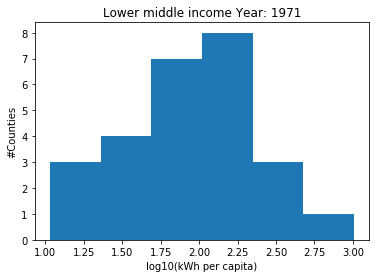

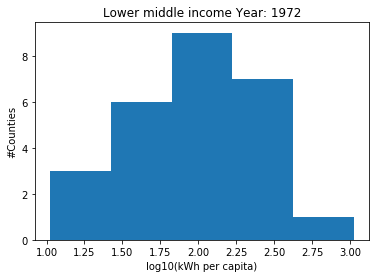

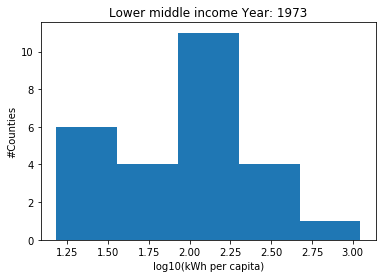

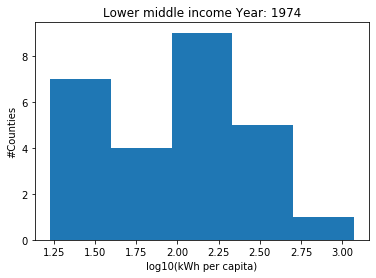

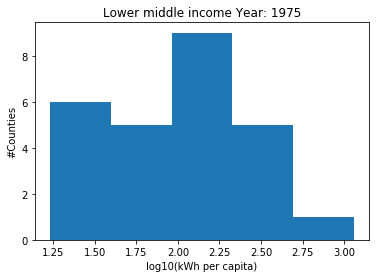

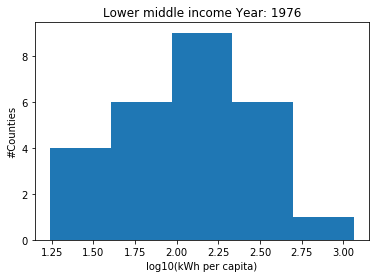

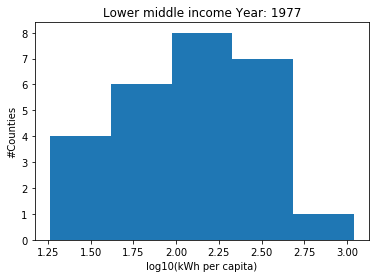

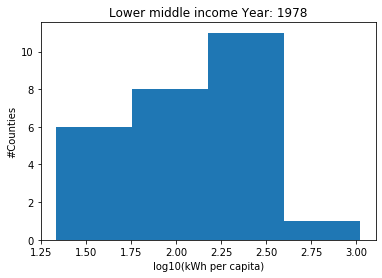

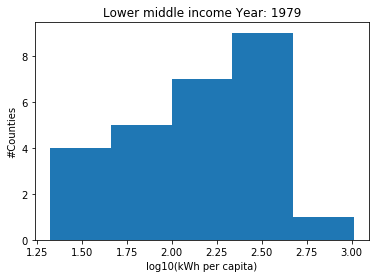

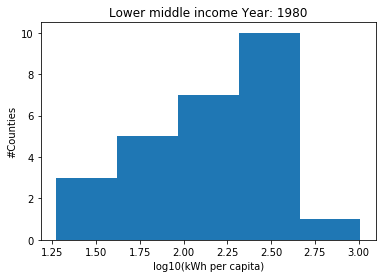

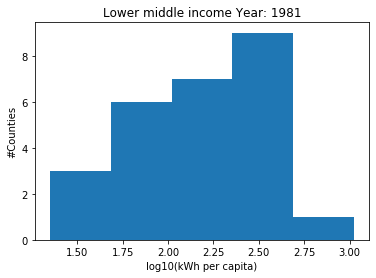

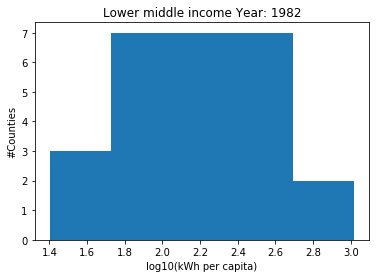

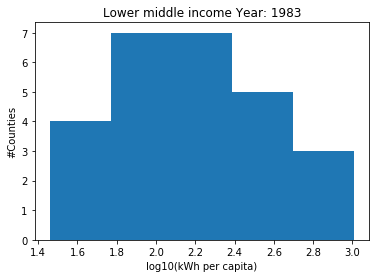

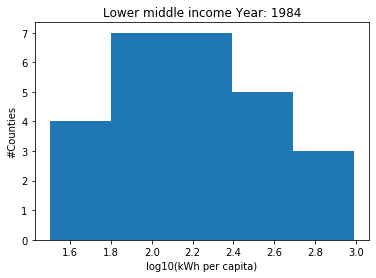

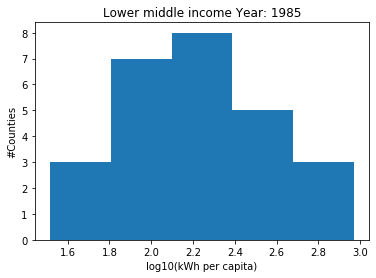

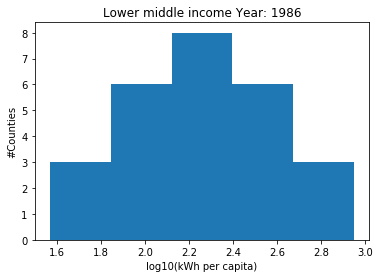

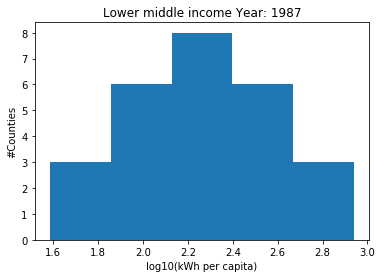

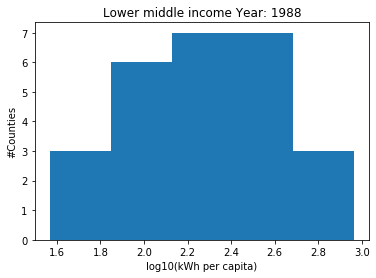

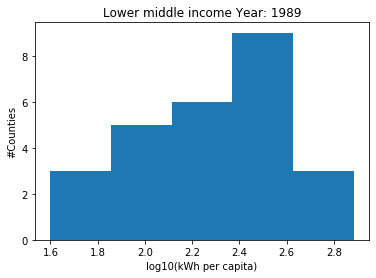

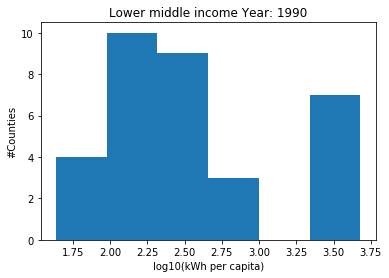

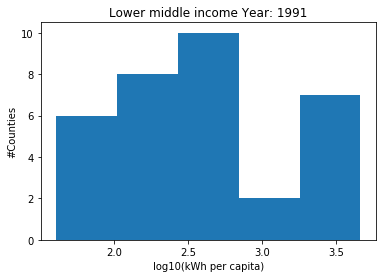

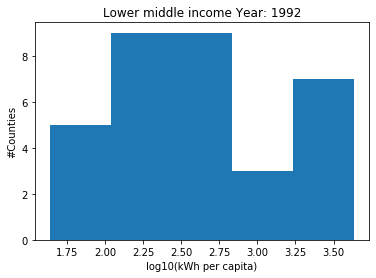

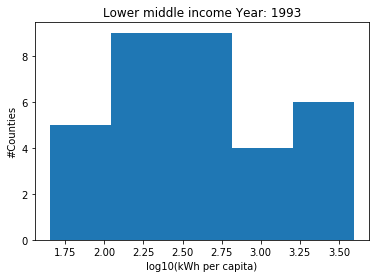

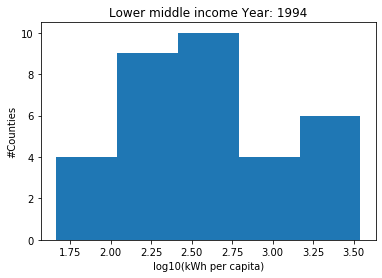

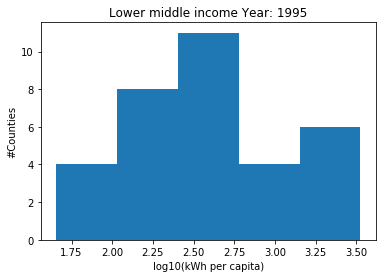

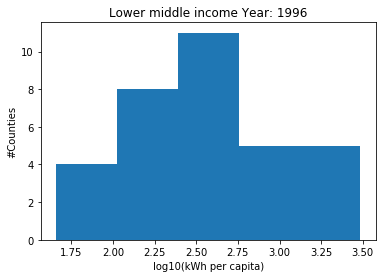

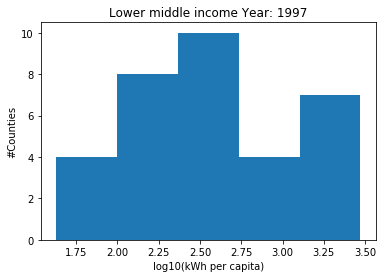

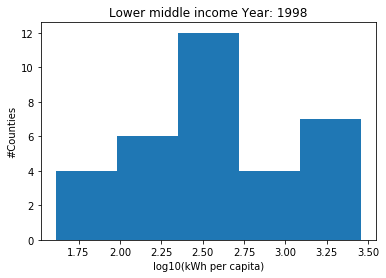

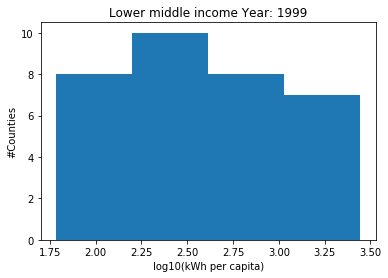

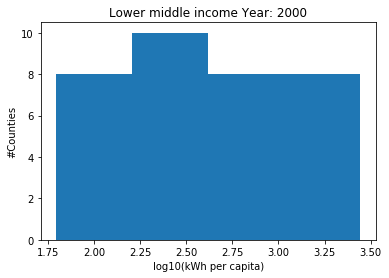

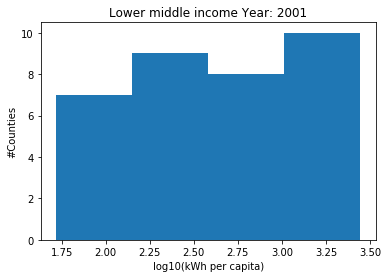

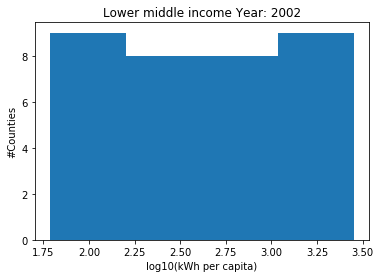

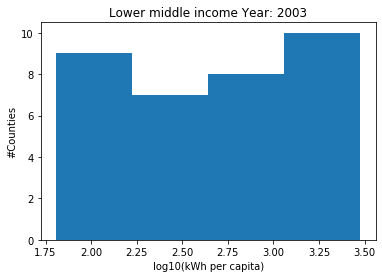

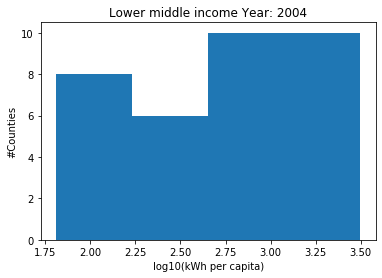

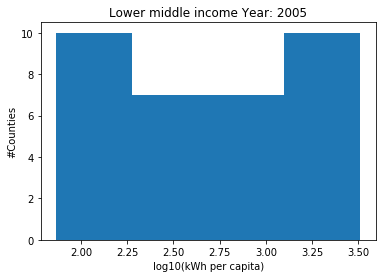

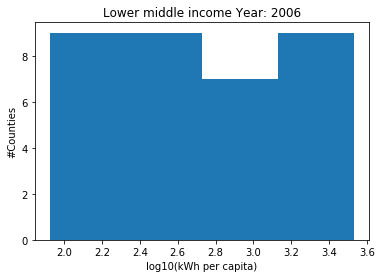

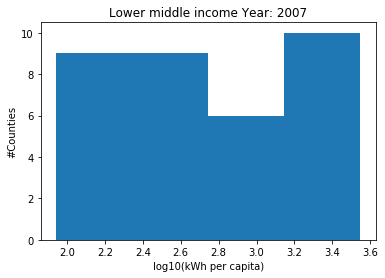

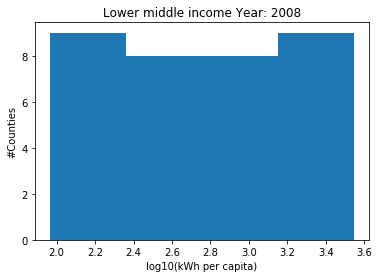

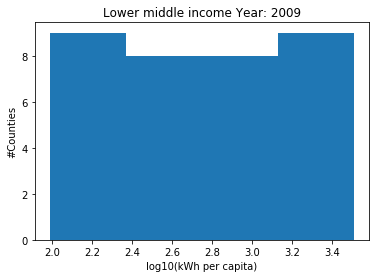

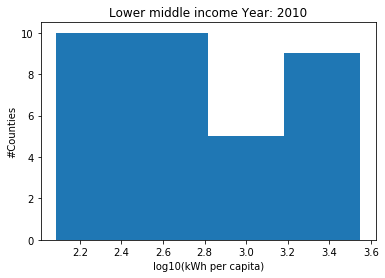

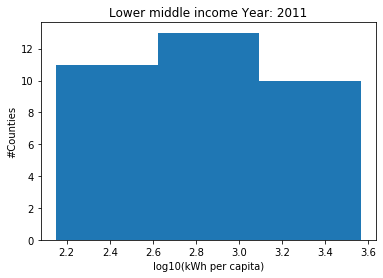

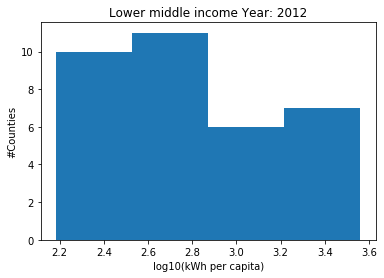

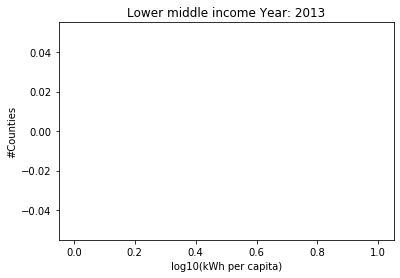

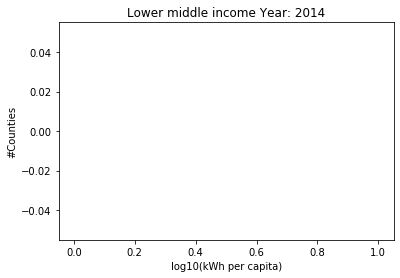

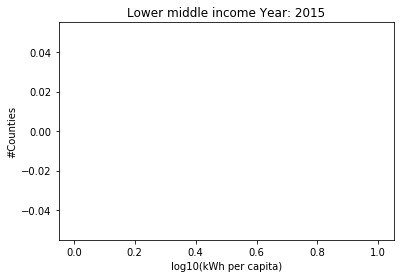

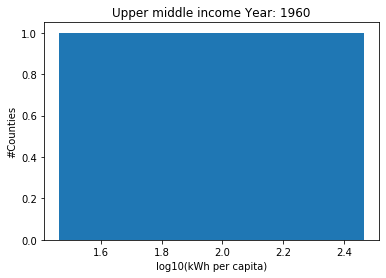

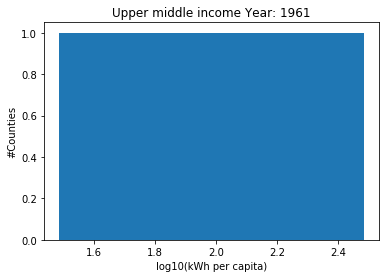

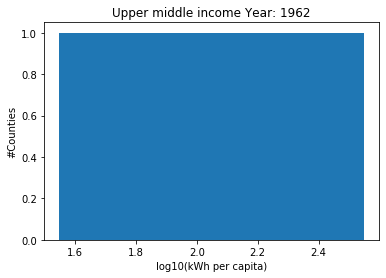

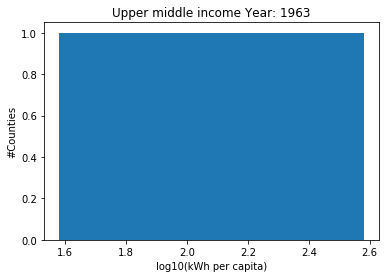

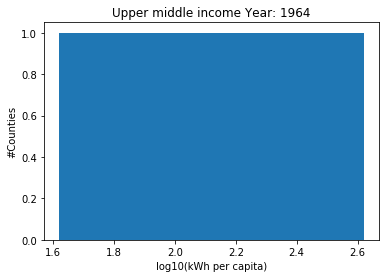

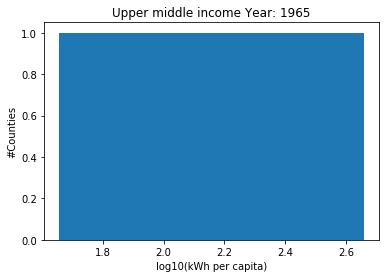

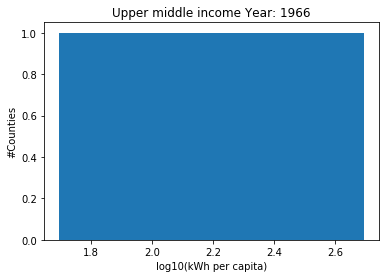

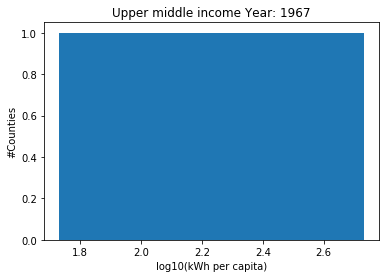

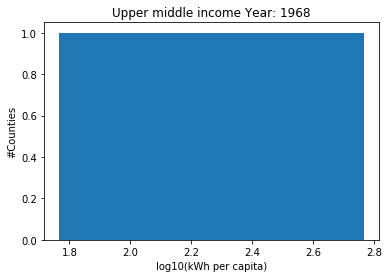

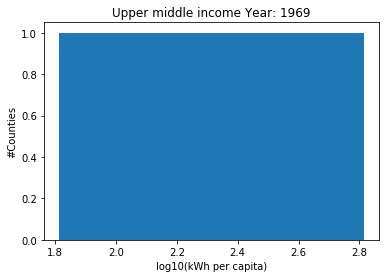

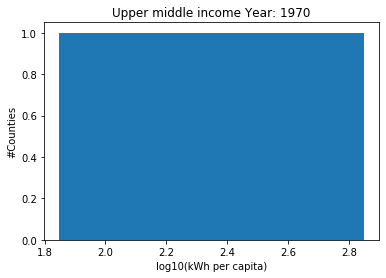

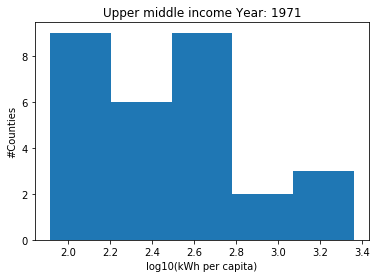

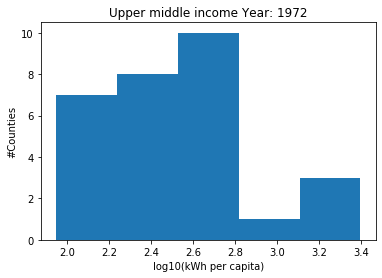

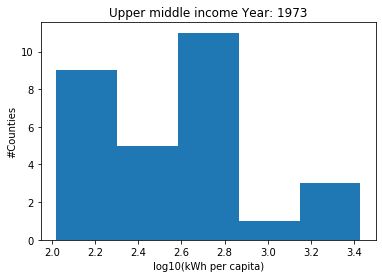

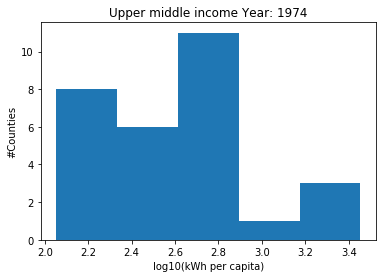

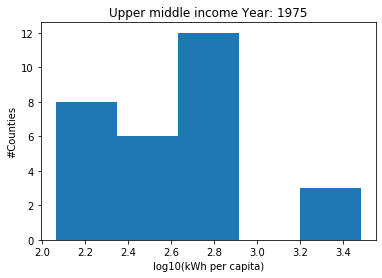

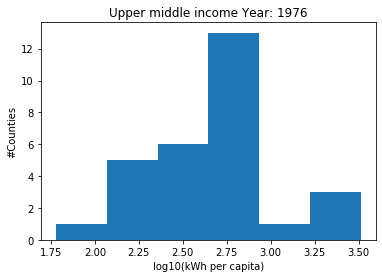

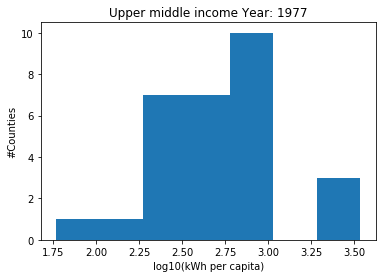

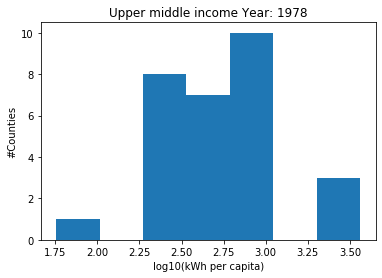

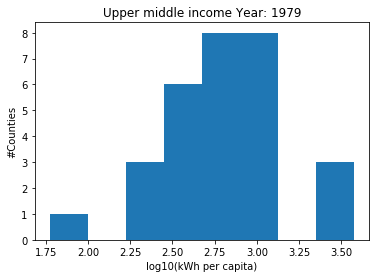

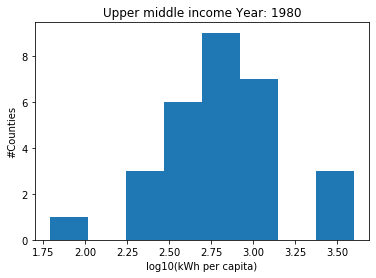

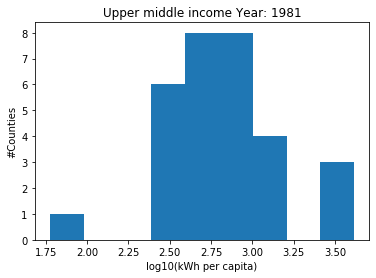

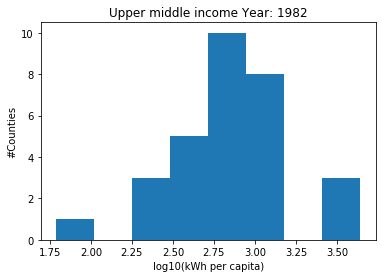

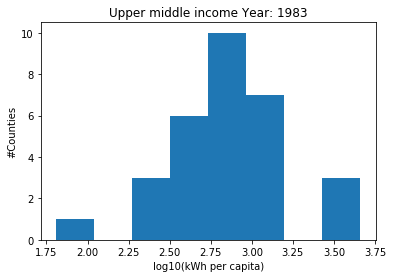

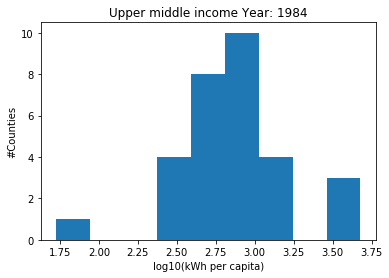

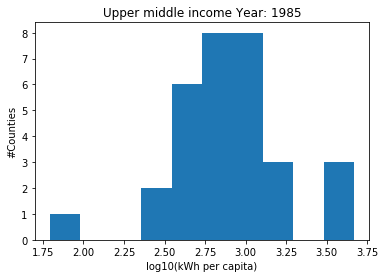

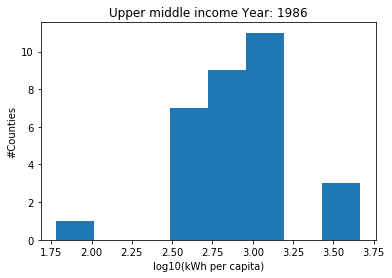

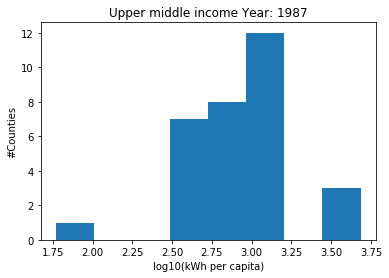

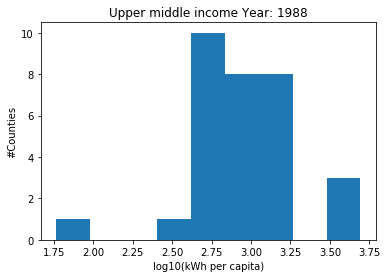

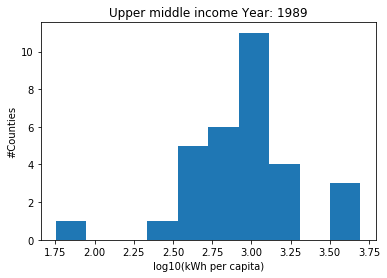

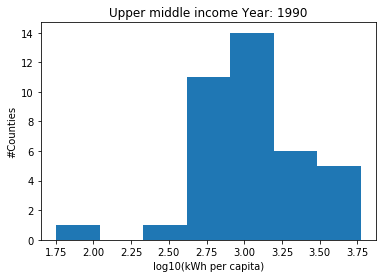

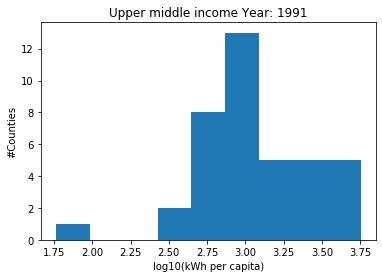

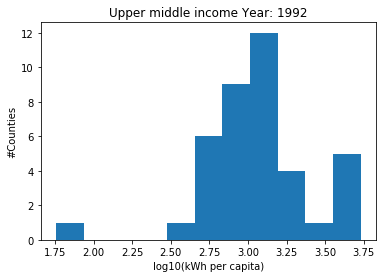

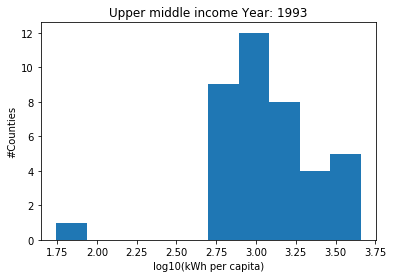

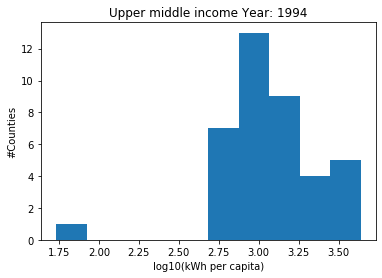

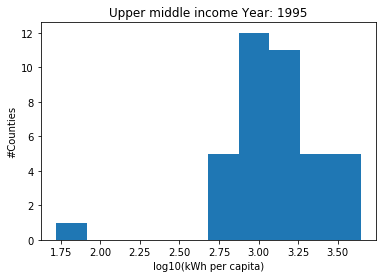

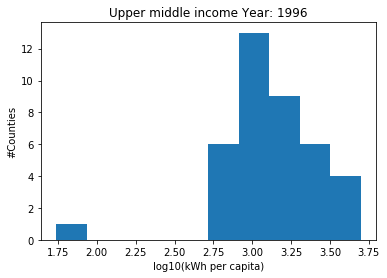

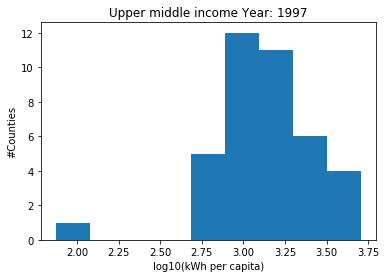

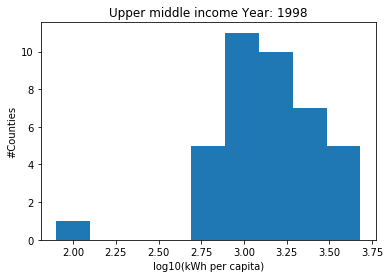

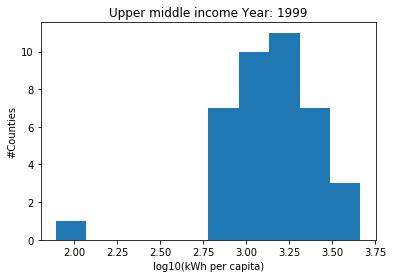

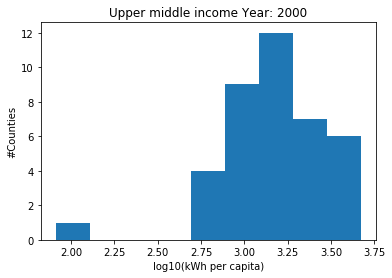

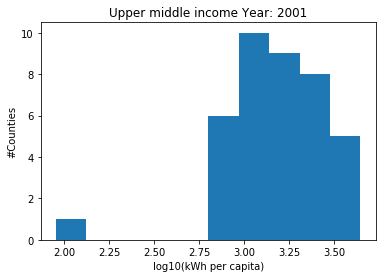

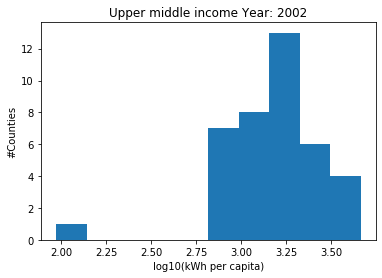

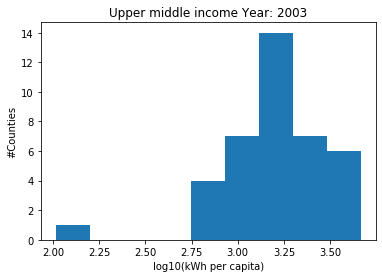

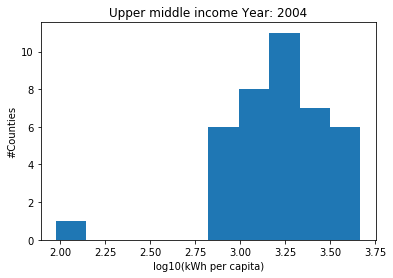

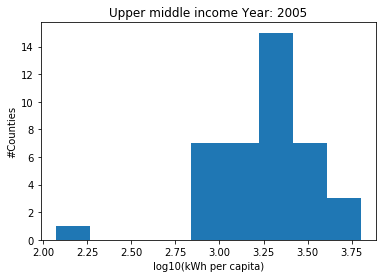

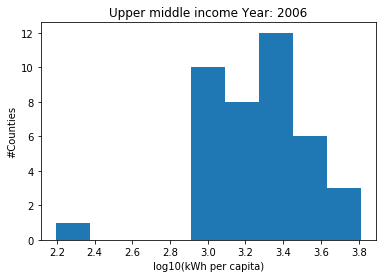

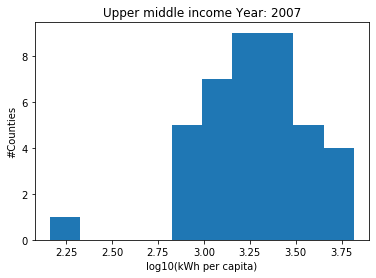

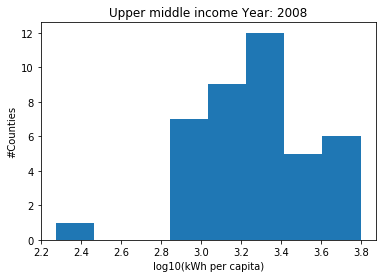

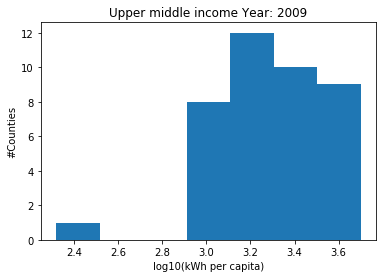

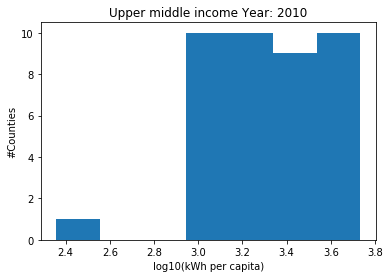

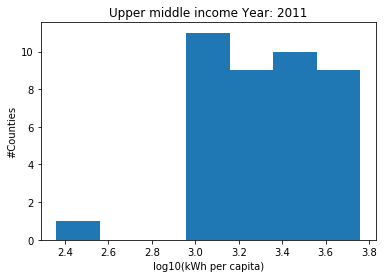

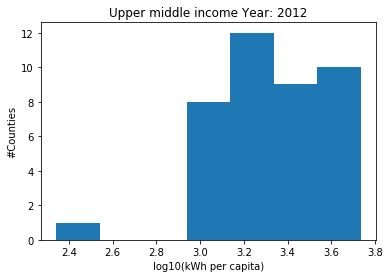

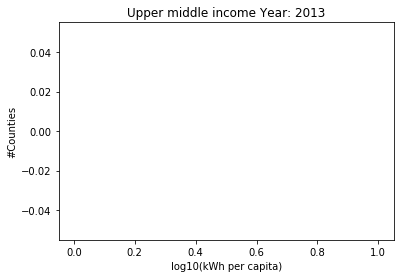

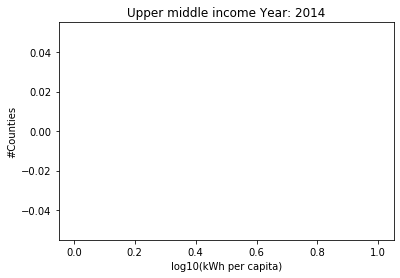

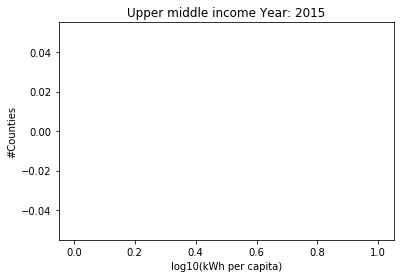

In [83]:
for income_group_name, income_group_data in el_power_consm_data_pivoted.groupby("income_group"):
    for year, year_data in income_group_data.groupby("year"):
        year_data = year_data[year_data["Electric power consumption (kWh per capita)"] > 0]
        plt.hist(np.log10(year_data["Electric power consumption (kWh per capita)"]), bins="fd")
        plt.title(f"{income_group_name} Year: {year}")
        plt.xlabel("log10(kWh per capita)")
        plt.ylabel("#Counties")
        plt.show()

## Hypothesis testing

Null hypothesis - There is no significant difference in electrical power consumption between income groups for each year.

Alt. hypothesis - There is a **significant** difference.

Alpha critical - 5%

In [84]:
years = el_power_consm_data_pivoted["year"].unique()
p_values_by_year = {}

for year in years:
    print(f"=================={year}==================")
    energy_cons_by_year = {}
    p_values_by_year[year] = []
    el_power_consm_data_pivoted_2 = el_power_consm_data_pivoted[el_power_consm_data_pivoted["year"] == year].dropna()
    
    for income_group_name, income_group_data in el_power_consm_data_pivoted_2.groupby("income_group"):
        income_group_data = income_group_data.dropna()
        energy_cons_by_year[income_group_name] = income_group_data["Electric power consumption (kWh per capita)"]
        
    for group_1 in energy_cons_by_year:
        for group_2 in energy_cons_by_year:
            p_value = stats.ttest_ind(energy_cons_by_year[group_1], energy_cons_by_year[group_2]).pvalue
            p_values_by_year[year].append([group_1, group_2, p_value])
            print(f"{group_1} <-> {group_2} : {p_value}")

==================1960==================
==================1961==================
==================1962==================
==================1963==================
==================1964==================
==================1965==================
==================1966==================
==================1967==================
==================1968==================
==================1969==================
==================1970==================
==================1971==================
==================1972==================
==================1973==================
==================1974==================
==================1975==================
==================1976==================
==================1977==================
==================1978==================
==================1979==================
==================1980==================
==================1981==================
==================1982==================
==================1983==================
================

C:\Users\Tzvetomir\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Tzvetomir\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tzvetomir\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Tzvetomir\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Tzvetomir\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)



Lower middle income <-> Low income : 0.3343549581663081
Lower middle income <-> Lower middle income : 1.0
Lower middle income <-> Upper middle income : 0.0017131216425316546
Upper middle income <-> High income : 4.2534240290378296e-05
Upper middle income <-> Low income : 0.012079988832983926
Upper middle income <-> Lower middle income : 0.0017131216425316546
Upper middle income <-> Upper middle income : 1.0
==================1995==================
High income <-> High income : 1.0
High income <-> Low income : 0.007955784782964551
High income <-> Lower middle income : 2.8666415740274244e-06
High income <-> Upper middle income : 2.892276672264072e-05
Low income <-> High income : 0.007955784782964551
Low income <-> Low income : 1.0
Low income <-> Lower middle income : 0.2505160152010787
Low income <-> Upper middle income : 0.011777939697196853
Lower middle income <-> High income : 2.8666415740274244e-06
Lower middle income <-> Low income : 0.2505160152010787
Lower middle income <-> Lower

Upper middle income <-> High income : 1.0803151581977286e-08
Upper middle income <-> Low income : 0.00025534683967410606
Upper middle income <-> Lower middle income : 1.3346158705788376e-06
Upper middle income <-> Upper middle income : 1.0
==================2005==================
High income <-> High income : 1.0
High income <-> Low income : 0.0014279790920390329
High income <-> Lower middle income : 1.908422941317672e-09
High income <-> Upper middle income : 1.3889948653029804e-08
Low income <-> High income : 0.0014279790920390329
Low income <-> Low income : 1.0
Low income <-> Lower middle income : 0.11419962239373446
Low income <-> Upper middle income : 0.00018946962142252251
Lower middle income <-> High income : 1.908422941317672e-09
Lower middle income <-> Low income : 0.11419962239373446
Lower middle income <-> Lower middle income : 1.0
Lower middle income <-> Upper middle income : 6.351503361071677e-07
Upper middle income <-> High income : 1.3889948653029804e-08
Upper middle inco

Let's look at the p-values for year 2010.

In [85]:
pd.DataFrame(p_values_by_year[2010]).pivot_table(index=[0], columns=[1], values=[2])

2                                 \
1                     High income Low income Lower middle income   
0                                                                  
High income          1.000000e+00   0.005697        2.262403e-07   
Low income           5.696966e-03   1.000000        5.807939e-02   
Lower middle income  2.262403e-07   0.058079        1.000000e+00   
Upper middle income  1.963939e-05   0.000016        1.787675e-08   

                                         
1                   Upper middle income  
0                                        
High income                1.963939e-05  
Low income                 1.627382e-05  
Lower middle income        1.787675e-08  
Upper middle income        1.000000e+00

Between the groups "High income" and "Low income" the null hypothesis is rejected at a confidence level of 5%. In fact only between the groups "Lower middle income" and "Low income" the null hypothesis is not rejected. This means that there might be an actual difference in power consumption between developed and under-developed countries.

In [86]:
pd.DataFrame(p_values_by_year[2009]).pivot_table(index=[0], columns=[1], values=[2])

2                                 \
1                     High income Low income Lower middle income   
0                                                                  
High income          1.000000e+00   0.005678        3.250883e-07   
Low income           5.677951e-03   1.000000        4.762496e-02   
Lower middle income  3.250883e-07   0.047625        1.000000e+00   
Upper middle income  1.382101e-05   0.000033        8.840374e-08   

                                         
1                   Upper middle income  
0                                        
High income                1.382101e-05  
Low income                 3.325615e-05  
Lower middle income        8.840374e-08  
Upper middle income        1.000000e+00

In 2009 there is a substantial difference between all income categories. Here the null hypothesis is rejected everywhere. And so on for the other years.

# Power Plan Data

Thesis: Countries that are more developed have more power plants and produce a lot of energy.

The date set comes with a very comprehensive meta data unlike the first one. It also come with an awesome pdf about how they gathered the data, limitations, etc.

### EDA

In [87]:
path_to_PPD = os.path.join("data", "power_plant_data", "global_power_plant_database.csv")

In [88]:
power_plant_data = pd.read_csv(path_to_PPD)

In [89]:
power_plant_data

country country_long                                               name  \
0         AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1         AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
2         AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
3         AFG  Afghanistan  Nangarhar (Darunta) Hydroelectric Power Plant ...   
4         AFG  Afghanistan            Northwest Kabul Power Plant Afghanistan   
...       ...          ...                                                ...   
29905     ZMB       Zambia                                              Ndola   
29906     ZMB       Zambia                                              Nkana   
29907     ZMB       Zambia                                     Victoria Falls   
29908     ZWE     Zimbabwe                   Hwange Coal Power Plant Zimbabwe   
29909     ZWE     Zimbabwe  Kariba Dam South Hydroelectric Power Station Z...   

          gppd_idnr  capacity_mw  latitude  longitude primary_fuel  \
0      GEODB0040538        33.00   32.3220    65.1190        Hydro   
1      GEODB0040541        66.00   34.5560    69.4787        Hydro   
2      GEODB0040534       100.00   34.6410    69.7170        Hydro   
3      GEODB0040536        11.55   34.4847    70.3633        Hydro   
4      GEODB0040540        42.00   34.5638    69.1134          Gas   
...             ...          ...       ...        ...          ...   
29905    WRI1022386        50.00  -12.9667    28.6333          Oil   
29906    WRI1022384        20.00  -12.8167    28.2000          Oil   
29907    WRI1022380       108.00  -17.9167    25.8500        Hydro   
29908  GEODB0040404       920.00  -18.3835    26.4700         Coal   
29909  GEODB0003803       750.00  -16.5222    28.7619        Hydro   

      other_fuel1 other_fuel2  ...  \
0             NaN         NaN  ...   
1             NaN         NaN  ...   
2             NaN         NaN  ...   
3             NaN         NaN  ...   
4             NaN         NaN  ...   
...           ...         ...  ...   
29905         NaN         NaN  ...   
29906         NaN         NaN  ...   
29907         NaN         NaN  ...   
29908         NaN         NaN  ...   
29909         NaN         NaN  ...   

                                                     url  geolocation_source  \
0                     http://globalenergyobservatory.org               GEODB   
1                     http://globalenergyobservatory.org               GEODB   
2                     http://globalenergyobservatory.org               GEODB   
3                     http://globalenergyobservatory.org               GEODB   
4                     http://globalenergyobservatory.org               GEODB   
...                                                  ...                 ...   
29905  http://www.erb.org.zm/reports/EnergySectorRepo...        Power Africa   
29906  http://www.erb.org.zm/reports/EnergySectorRepo...        Power Africa   
29907  http://www.erb.org.zm/reports/EnergySectorRepo...        Power Africa   
29908                 http://globalenergyobservatory.org               GEODB   
29909                 http://globalenergyobservatory.org               GEODB   

       wepp_id year_of_capacity_data generation_gwh_2013 generation_gwh_2014  \
0      1009793                2017.0                 NaN                 NaN   
1      1009795                2017.0                 NaN                 NaN   
2      1009797                2017.0                 NaN                 NaN   
3      1009787                2017.0                 NaN                 NaN   
4          NaN                2017.0                 NaN                 NaN   
...        ...                   ...                 ...                 ...   
29905  1089529                   NaN                 NaN                 NaN   
29906  1043097                   NaN                 NaN                 NaN   
29907  1033763                   NaN                 N

In [90]:
power_plant_data.shape

(29910, 24)

In [91]:
power_plant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   29910 non-null  object 
 1   country_long              29910 non-null  object 
 2   name                      29910 non-null  object 
 3   gppd_idnr                 29910 non-null  object 
 4   capacity_mw               29910 non-null  float64
 5   latitude                  29910 non-null  float64
 6   longitude                 29910 non-null  float64
 7   primary_fuel              29910 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    29895 non-null  object 
 14  url   

Everything looks fine, if i were to use the long & lat data, they should be converted to a more special data type. Both WDI_data and this data set have the column with the 3 letter codes. It might be useful to add the groupings here.

### Massaging the data set

In [92]:
WDI_data_pivoted[["country_code", "income_group"]]

country_code income_group
0              AFG   Low income
1              AFG   Low income
2              AFG   Low income
3              AFG   Low income
4              AFG   Low income
...            ...          ...
11978          ZWE   Low income
11979          ZWE   Low income
11980          ZWE   Low income
11981          ZWE   Low income
11982          ZWE   Low income

[11983 rows x 2 columns]

In [93]:
cols = list(power_plant_data.columns)
cols[0] = "country_code"
power_plant_data.columns = cols

In [94]:
power_plant_data = power_plant_data.merge(WDI_data_pivoted[["country_code", "income_group"]])

In [95]:
power_plant_data

country_code country_long  \
0                AFG  Afghanistan   
1                AFG  Afghanistan   
2                AFG  Afghanistan   
3                AFG  Afghanistan   
4                AFG  Afghanistan   
...              ...          ...   
1669747          ZWE     Zimbabwe   
1669748          ZWE     Zimbabwe   
1669749          ZWE     Zimbabwe   
1669750          ZWE     Zimbabwe   
1669751          ZWE     Zimbabwe   

                                                      name     gppd_idnr  \
0             Kajaki Hydroelectric Power Plant Afghanistan  GEODB0040538   
1             Kajaki Hydroelectric Power Plant Afghanistan  GEODB0040538   
2             Kajaki Hydroelectric Power Plant Afghanistan  GEODB0040538   
3             Kajaki Hydroelectric Power Plant Afghanistan  GEODB0040538   
4             Kajaki Hydroelectric Power Plant Afghanistan  GEODB0040538   
...                                                    ...           ...   
1669747  Kariba Dam South Hydroelectric Power Station Z...  GEODB0003803   
1669748  Kariba Dam South Hydroelectric Power Station Z...  GEODB0003803   
1669749  Kariba Dam South Hydroelectric Power Station Z...  GEODB0003803   
1669750  Kariba Dam South Hydroelectric Power Station Z...  GEODB0003803   
1669751  Kariba Dam South Hydroelectric Power Station Z...  GEODB0003803   

         capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0               33.0   32.3220    65.1190        Hydro         NaN   
1               33.0   32.3220    65.1190        Hydro         NaN   
2               33.0   32.3220    65.1190        Hydro         NaN   
3               33.0   32.3220    65.1190        Hydro         NaN   
4               33.0   32.3220    65.1190        Hydro         NaN   
...              ...       ...        ...          ...         ...   
1669747        750.0  -16.5222    28.7619        Hydro         NaN   
1669748        750.0  -16.5222    28.7619        Hydro         NaN   
1669749        750.0  -16.5222    28.7619        Hydro         NaN   
1669750        750.0  -16.5222    28.7619        Hydro         NaN   
1669751        750.0  -16.5222    28.7619        Hydro         NaN   

        other_fuel2  ... geolocation_source  wepp_id year_of_capacity_data  \
0               NaN  ...              GEODB  1009793                2017.0   
1               NaN  ...              GEODB  1009793                2017.0   
2               NaN  ...              GEODB  1009793                2017.0   
3               NaN  ...              GEODB  1009793                2017.0   
4               NaN  ...              GEODB  1009793                2017.0   
...             ...  ...                ...      ...                   ...   
1669747         NaN  ...              GEODB  1033857                2017.0   
1669748         NaN  ...              GEODB  1033857                2017.0   
1669749         NaN  ...              GEODB  1033857                2017.0   
1669750         NaN  ...              GEODB  1033857                2017.0   
1669751         NaN  ...              GEODB  1033857                2017.0   

        generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                       NaN                 NaN                 NaN   
1                       NaN                 NaN                 NaN   
2                       NaN                 NaN                 NaN   
3                       NaN                 NaN                 NaN   
4                       NaN                 NaN                 NaN   
...                     ...                 ...                 ...   
1669747                 NaN                 NaN                 NaN   
1669748                 NaN                 NaN                 NaN   
1669749                 NaN                 NaN                 NaN   
1669750                 NaN                 NaN                 NaN   
1669751                 NaN                 NaN                 NaN   

        generation_

In [96]:
power_plant_data["primary_fuel"].unique()

array(['Hydro', 'Gas', 'Other', 'Oil', 'Nuclear', 'Coal', 'Solar', 'Wind',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Cogeneration', 'Storage'], dtype=object)

Do high income countries have more power plants?

In [97]:
group_and_number_of_power_plants = {}

for group_name, group_data in power_plant_data.groupby("income_group"):
    group_and_number_of_power_plants[group_name] = len(group_data)
    print(f"{group_name} -> {len(group_data)} power plants")

High income -> 1172808 power plants
Low income -> 9576 power plants
Lower middle income -> 116704 power plants
Upper middle income -> 370664 power plants


Power plan numbers add up to the number of rows, so this should be correct. And in fact more developed countries do have more power plants.

In [98]:
# power_plant_data["primary_fuel"].isin(advanced_energy_sources)

Do developed countries have more advanced power plants? Yes, by a substantial amount too.

In [99]:
group_and_number_of_power_plants = {}
advanced_energy_sources = {"Hydro", "Solar", "Nuclear"}

for group_name, group_data in power_plant_data.groupby("income_group"):
    number_of_power_plants = sum(group_data["primary_fuel"].isin(advanced_energy_sources))
    group_and_number_of_power_plants[group_name] = number_of_power_plants
    print(f"{group_name} -> {number_of_power_plants} power plants")

High income -> 557760 power plants
Low income -> 5544 power plants
Lower middle income -> 50960 power plants
Upper middle income -> 127456 power plants


How do the distributions look for each group concerning power generation.

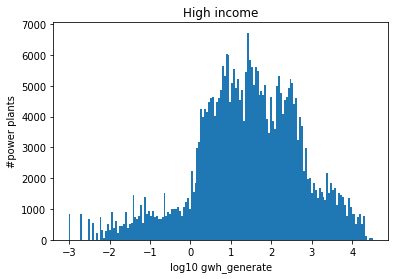

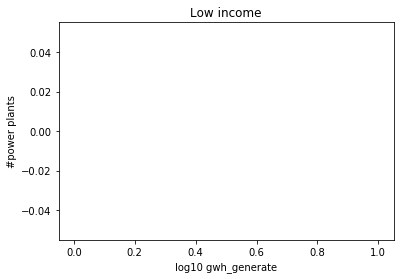

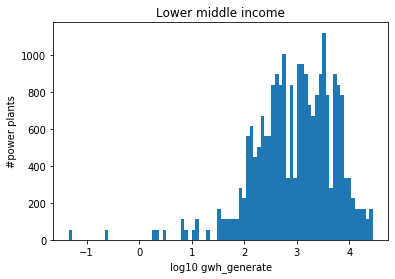

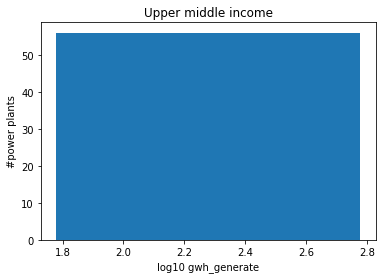

In [100]:
group_and_gwh_generated_2017 = {}

for group_name, group_data in power_plant_data.groupby("income_group"):
    group_data = group_data[group_data["generation_gwh_2014"] > 0]
    group_and_gwh_generated_2017[group_name] = group_data["generation_gwh_2014"]
    plt.hist(np.log10(group_and_gwh_generated_2017[group_name]), bins="fd")
    plt.title(group_name)
    plt.xlabel("log10 gwh_generate")
    plt.ylabel("#power plants")
    plt.show()

There is some missing data, and some ugly graphs.

What are the capacity_mw distributions like?

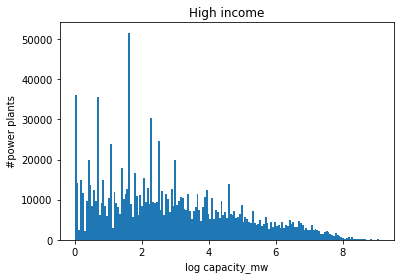

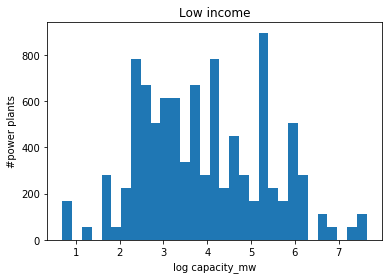

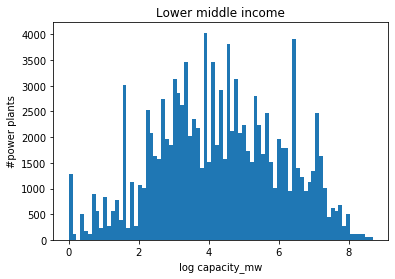

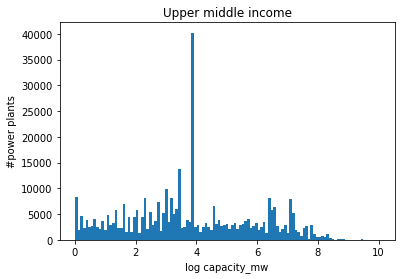

In [101]:
group_and_capacity_mw = {}

for group_name, group_data in power_plant_data.groupby("income_group"):
    group_data = group_data[group_data["capacity_mw"] > 0]
    group_and_capacity_mw[group_name] = group_data["capacity_mw"]
    plt.hist(np.log(group_and_capacity_mw[group_name]), bins="fd")
    plt.title(group_name)
    plt.xlabel("log capacity_mw")
    plt.ylabel("#power plants")
    plt.show()

# Hypothesis testing 2
Is there a significant difference in the capacity of power plants between income groups?

H0 - There is no significant difference

H1 - There is a significant difference

Alpha critical - 5%

In [102]:
p_values_by_income = []
for group_1 in group_and_capacity_mw:
    for group_2 in group_and_capacity_mw:
        index_1 = group_1
        index_2 = group_2
        p_value = stats.ttest_ind(group_and_capacity_mw[group_1], group_and_capacity_mw[group_2]).pvalue
        p_values_by_income.append([group_1, group_2, p_value])

In [103]:
stats.ttest_ind(group_and_capacity_mw["High income"], group_and_capacity_mw["Lower middle income"])

Ttest_indResult(statistic=-111.10230970478199, pvalue=0.0)

In [104]:
p_values_by_income

[['High income', 'High income', 1.0],
 ['High income', 'Low income', 0.865502885799265],
 ['High income', 'Lower middle income', 0.0],
 ['High income', 'Upper middle income', 0.0],
 ['Low income', 'High income', 0.865502885799265],
 ['Low income', 'Low income', 1.0],
 ['Low income', 'Lower middle income', 4.2910273008247616e-156],
 ['Low income', 'Upper middle income', 4.7477887390113164e-95],
 ['Lower middle income', 'High income', 0.0],
 ['Lower middle income', 'Low income', 4.2910273008247616e-156],
 ['Lower middle income', 'Lower middle income', 1.0],
 ['Lower middle income', 'Upper middle income', 0.0207063810882326],
 ['Upper middle income', 'High income', 0.0],
 ['Upper middle income', 'Low income', 4.7477887390113164e-95],
 ['Upper middle income', 'Lower middle income', 0.0207063810882326],
 ['Upper middle income', 'Upper middle income', 1.0]]

In [105]:
pd.DataFrame(p_values_by_income).pivot_table(index=[0], columns=[1], values=[2])

2                                     \
1                   High income     Low income Lower middle income   
0                                                                    
High income            1.000000   8.655029e-01        0.000000e+00   
Low income             0.865503   1.000000e+00       4.291027e-156   
Lower middle income    0.000000  4.291027e-156        1.000000e+00   
Upper middle income    0.000000   4.747789e-95        2.070638e-02   

                                         
1                   Upper middle income  
0                                        
High income                0.000000e+00  
Low income                 4.747789e-95  
Lower middle income        2.070638e-02  
Upper middle income        1.000000e+00

Interesting results. It happens that between the groups "High income" and "Low income" we cannot reject the null hypothesis at level 5%. Between all other groups there are significant differences and H0 can be rejected. These huge differences might be because of the unbalanced nature of the data set.

# Conclusion

Developed counties seem to use more energy and seem to export more tech. Developed countries also have more "advanced power plants". There are significant differences in power plant capacity between some income groups.

## Other similar research.

- https://www.bbc.co.uk/bitesize/guides/zpmmmp3/revision/3

- https://reader.elsevier.com/reader/sd/pii/S0973082616301892?token=63AD7D201BDE29B455931594175BA990226D0B488CFF71E99574366FE2D7DB1FFBF29CE8A91389AC9D173E09FD9EFE99